<a href="https://colab.research.google.com/github/geeorgebixleer/Clusterizacion_Esencia_del_cliente/blob/main/Clusterizaci%C3%B3n_Esencia_del_cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clusterización: Esencia del cliente**

La junta directiva de la cadena de supermercados Universal Food ha observado una estabilización en sus ventas y busca comprender cómo mejorar la relación con sus clientes, entendiendo sus hábitos de compra, para ofrecerles un servicio de mayor calidad.

Para el propósito anterior, se realiza la segmentación de los clientes mediante un algoritmo de machine learning conocido como cluserización.Al conocer los hábitos de consumo de los clientes, es posible asignarles una categoría de acuerdo a sus preferencias, de forma que, se pueda proporcionarles una experiencia de compra más personalizada,
rápida y efectiva.

El conjunto de datos tomado para el presente análisis está disponible en Kaggle: https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart

- **categoria_alimento:** tipo de alimentos.
- **departamento:** departamento al que pertenece el tipo de alimento.
- **tipo:** familia de alimentos a la que pertenece.
- **ventas_tienda(en millones):** ventas en tienda (en millones de dólares).
- **costo_tienda(en millones):** costo o gasto de la tienda (en millones de dólares).
- **ventas_unitarias(en millones):** cantidad unitaria de ventas en tiendas  (en millones).
- **promocion:** nombre de la promoción realizada en los medios.
- **pais:** país donde se realiza la venta.
- **estado_civil:** estado civil de los clientes.
- **genero:** género de los clientes.
- **total_de_hijos:** total de niños en el hogar.
- **escolaridad:** nivel de estudios del cliente.
- **membresia:** membresia disponible para el cliente.
- **ocupacion:** ocupación del cliente.
- **vivienda_propia:** el cliente es propietario de casa o no.
- **promedio_autos(aprox):** según los detalles llenados por el cliente.
- **ingreso_anual:** según los detalles llenados por el cliente.
- **numero_hijos:** según los detalles llenados por el cliente.
- **marca:** marca del producto.
- **precio_recomendado:** empaquetado listo para exponer (SRP).
- **peso_bruto:** peso bruto del producto.
- **peso_neto:** peso neto del producto.
- **empaque_reciclable:** El empaque es reciclable.
- **bajo_en_grasa:** alimento bajo en grasa.
- **unidades_por_caja:** unidades disponibles en los estantes de cada tienda.
- **comercio:** tipo de tienda.
- **ciudad:** tienda disponible en la ciudad.
- **estado:** tienda presente en cuál estado.
- **pies_cuadrados_tienda:** área de la tienda disponible en metros cuadrados (m2).
- **pies_cuadrados_comestibles:** área de comestibles en metros cuadrados (m2).
- **pies_cuadrados_congelados:** área de alimentos congelados en metros cuadrados (m2).
- **pies_cuadrados_carne:** área de carne en metros cuadrados (m2).
- **cafeteria:** barra de café disponible en tienda.
- **tienda_de_videos:** tienda de videos/tienda de juegos disponible en tienda.
- **barra_de_ensaladas:** barra de ensaladas disponible en tienda.
- **comida_preparada:** comida preparada disponible en tienda.
- **floristeria:** estantes de flores disponibles en tienda.
- **divulgacion:** medios de comunicación usados aquí.
- **costo:** costo de adquisición de clientes en dólares (USD).

##1.Configuración del ambiente

In [ ]:
# versión de las librerias
!python -V
print('------')
!pip show pandas | grep 'Name\|Version'
print('------')
!pip show numpy | grep 'Name\|Version'
print('------')
!pip show seaborn | grep 'Name\|Version'
print('------')
!pip show matplotlib | grep 'Name\|Version'


Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.23.5
------
Name: seaborn
Version: 0.13.1
------
Name: matplotlib
Version: 3.7.1


In [ ]:
# importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from numpy import array_split
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
pd.set_option('display.max_columns', None)

##2.Obtención y transformación de datos

In [ ]:
# conexión con drive para importar dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importando link del dataset
uri = "/content/drive/MyDrive/Bootcamp - Data Science/Modulo3_Machine Learning/Esencia_del_cliente-Challege/media prediction and its cost.csv"
datos = pd.read_csv(uri) #cargando dataset

In [ ]:
# delimitando impresión de máximo 10 filas y 40 columnas
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',40)
datos.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [ ]:
# diccionario para renombrar columnas
columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'membresia',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox).1',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [ ]:
# nuevo dataset con datos en español
datos_sp = datos.rename(columns=columnas)
datos_sp.head(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
# eliminando columna repetida
datos_sp = datos_sp.drop(columns = 'promedio_autos(aprox).1', axis=1 )

In [ ]:
# diccionarios para renombrar valores de columnas
categoria = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

pais = {'USA':'Estados Unidos', 'Mexico':'México', 'Canada':'Canadá'}

estado_civil = {'S':'Soltero', 'M':'Casado'}

genero ={'F':'Femenino', 'M':'Masculino'}

membresia = {'Normal':'Sin membresia', 'Bronze':'Bronce', 'Golden': 'Oro', 'Silver':'Plata'}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

vivienda_propia= {'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}

comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}

divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

In [ ]:
# renombrando valores de columnas
datos_sp.categoria_alimento = datos_sp.categoria_alimento.map(categoria)
datos_sp.departamento = datos_sp.departamento.map(departamento)
datos_sp.tipo =  datos_sp.tipo.map(tipo)
datos_sp.promocion = datos_sp.promocion.map(promocion)
datos_sp.escolaridad = datos_sp.escolaridad.map(escolaridad)
datos_sp.pais = datos_sp.pais.map(pais)
datos_sp.estado_civil = datos_sp.estado_civil.map(estado_civil)
datos_sp.genero = datos_sp.genero.map(genero)
datos_sp.membresia = datos_sp.membresia.map(membresia)
datos_sp.ocupacion = datos_sp.ocupacion.map(ocupacion)
datos_sp.vivienda_propia = datos_sp.vivienda_propia.map(vivienda_propia)
datos_sp.ingreso_anual = datos_sp.ingreso_anual.map(ingreso_anual)
datos_sp.comercio = datos_sp.comercio.map(comercio)
datos_sp.divulgacion = datos_sp.divulgacion.map(divulgacion)

In [ ]:
datos_sp.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
13954,Bebidas calientes,Bebidas,Bebida,10.92,3.6036,4.0,Especial luz verde,Estados Unidos,Soltero,Masculino,1.0,Superior,Bronce,Gestión,No,4.0,60000,0.0,CDR,2.73,16.70,14.70,1.0,0.0,14.0,Supermercado,Bremerton,WA,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Cupón en la tienda,123.02
54052,Vegetales,Alimentos congelados,Comida,6.56,2.2960,4.0,Dos por uno,México,Casado,Femenino,3.0,Superior,Oro,Profesional,Sí,2.0,60000,3.0,Big Time,1.64,20.70,18.70,0.0,0.0,1.0,Supermercado de lujo,Hidalgo,Zacatecas,30584.0,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Entrega en el punto de venta,68.63
46834,Mariscos,Mariscos,Comida,5.10,1.5810,3.0,Gratis para todos,Estados Unidos,Soltero,Femenino,1.0,Maestría,Bronce,Profesional,Sí,3.0,40000,0.0,Dual City,1.70,12.70,10.60,1.0,0.0,3.0,Supermercado,Portland,OR,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio",126.24
11743,Productos lácteos,Productos lácteos,Comida,15.80,6.1620,4.0,Días de luz verde,México,Soltero,Masculino,3.0,Superior,Plata,Profesional,No,3.0,60000,0.0,Club,3.95,9.95,7.94,0.0,1.0,36.0,Supermercado gourmet,Camacho,Zacatecas,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,Periódico diario,75.76
41449,Acompañamientos,Charcutería,Comida,3.56,1.6020,4.0,Recortadores de dólares,Estados Unidos,Casado,Masculino,0.0,Secundaria,Plata,Técnico,Sí,3.0,40000,0.0,American,0.89,19.90,17.80,0.0,0.0,3.0,Supermercado,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Correo masivo,141.26


<Axes: >

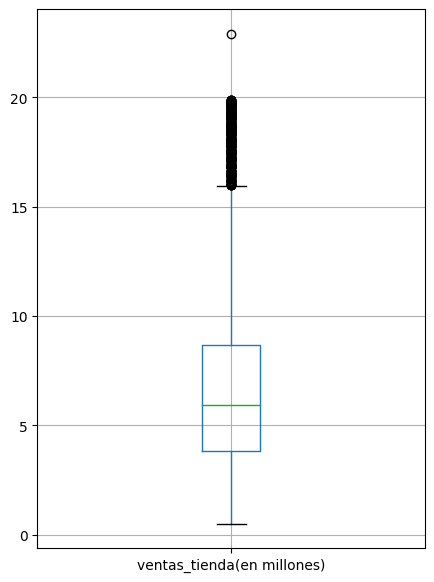

In [ ]:
datos_sp.boxplot(['ventas_tienda(en millones)'], figsize = (5,7)) #outliers en ventas_tienda

In [ ]:
datos_sp_out = datos_sp[datos_sp['ventas_tienda(en millones)'] > 15] #dataset temporal que indica outliers
print(datos_sp_out.shape) #total de outliers en el dataset temporal
datos_sp = datos_sp[datos_sp['ventas_tienda(en millones)'] < 15] #sobreescrita de dataset, limpio de outliers
print(datos_sp.shape) #total de registros sin outliers

(1191, 39)
(59215, 39)


<Axes: >

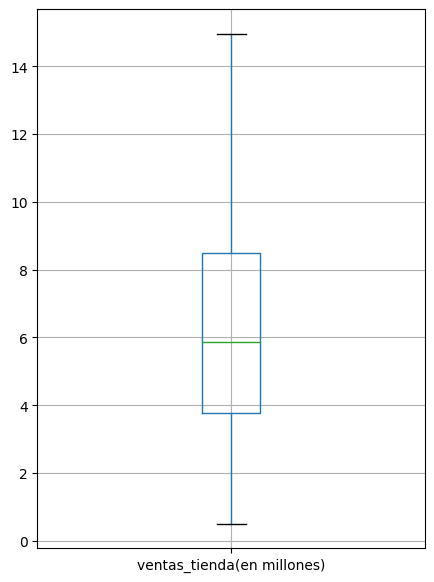

In [ ]:
datos_sp.boxplot(['ventas_tienda(en millones)'], figsize = (5,7))

In [ ]:
# exportando a csv
datos_sp.to_csv('foodmart.csv', index = False)

##3.Exploración de datos

In [ ]:
datos_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59215 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             59215 non-null  object 
 1   departamento                   59215 non-null  object 
 2   tipo                           59215 non-null  object 
 3   ventas_tienda(en millones)     59215 non-null  float64
 4   costo_tienda(en millones)      59215 non-null  float64
 5   ventas_unitarias(en millones)  59215 non-null  float64
 6   promocion                      59215 non-null  object 
 7   pais                           59215 non-null  object 
 8   estado_civil                   59215 non-null  object 
 9   genero                         59215 non-null  object 
 10  total_de_hijos                 59215 non-null  float64
 11  escolaridad                    59215 non-null  object 
 12  membresia                      59215 non-null 

In [ ]:
#sns.displot(data=datos_sp, x="membresia", hue="ventas_tienda(en millones)", col="ventas_tienda(en millones)")

FUNCION GRAFICA DE BARRAS HORIZONTAL

In [ ]:
def grafica_barras(df, var_x, var_y, var_cat,tema): #funcion para graficar en barras

    data = df.groupby([var_cat, var_x])[var_y].sum().reset_index() #agrupa var_cat y var_x, suma valores var_y y genera un nuevo index

    plt.figure(figsize=(18, 7)) #tamaño de gráfico

    sns.barplot(x=var_x, y=var_y, hue=var_cat, data=data) #variables del grafico
    plt.xlabel(var_x, fontsize=14, fontweight='bold',color='grey') #etiqueta eje x
    plt.ylabel(var_y, fontsize=14, fontweight='bold',color='grey') #etiqueta eje y
    plt.suptitle(f'{var_y} por {var_x}/{var_cat}', fontsize=23, fontweight='bold',color='k') #imprime titulo del gráfico
    plt.xticks(rotation=90) #inclinación de etiquetas de cada barra
    plt.legend(title=var_cat)
    plt.show()


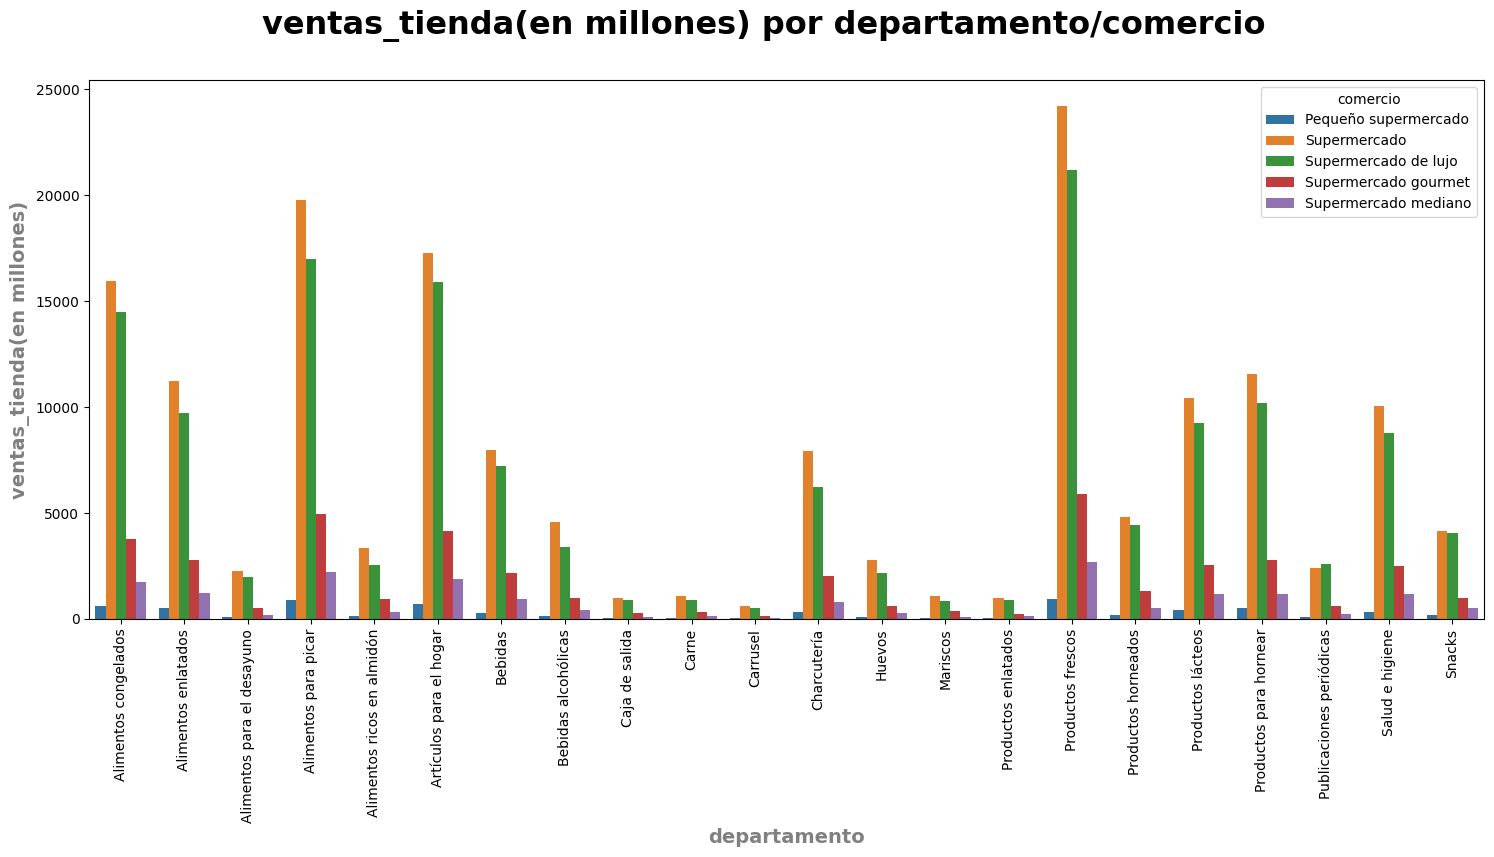

In [ ]:
grafica_barras(datos_sp, 'departamento', 'ventas_tienda(en millones)','comercio','magma')

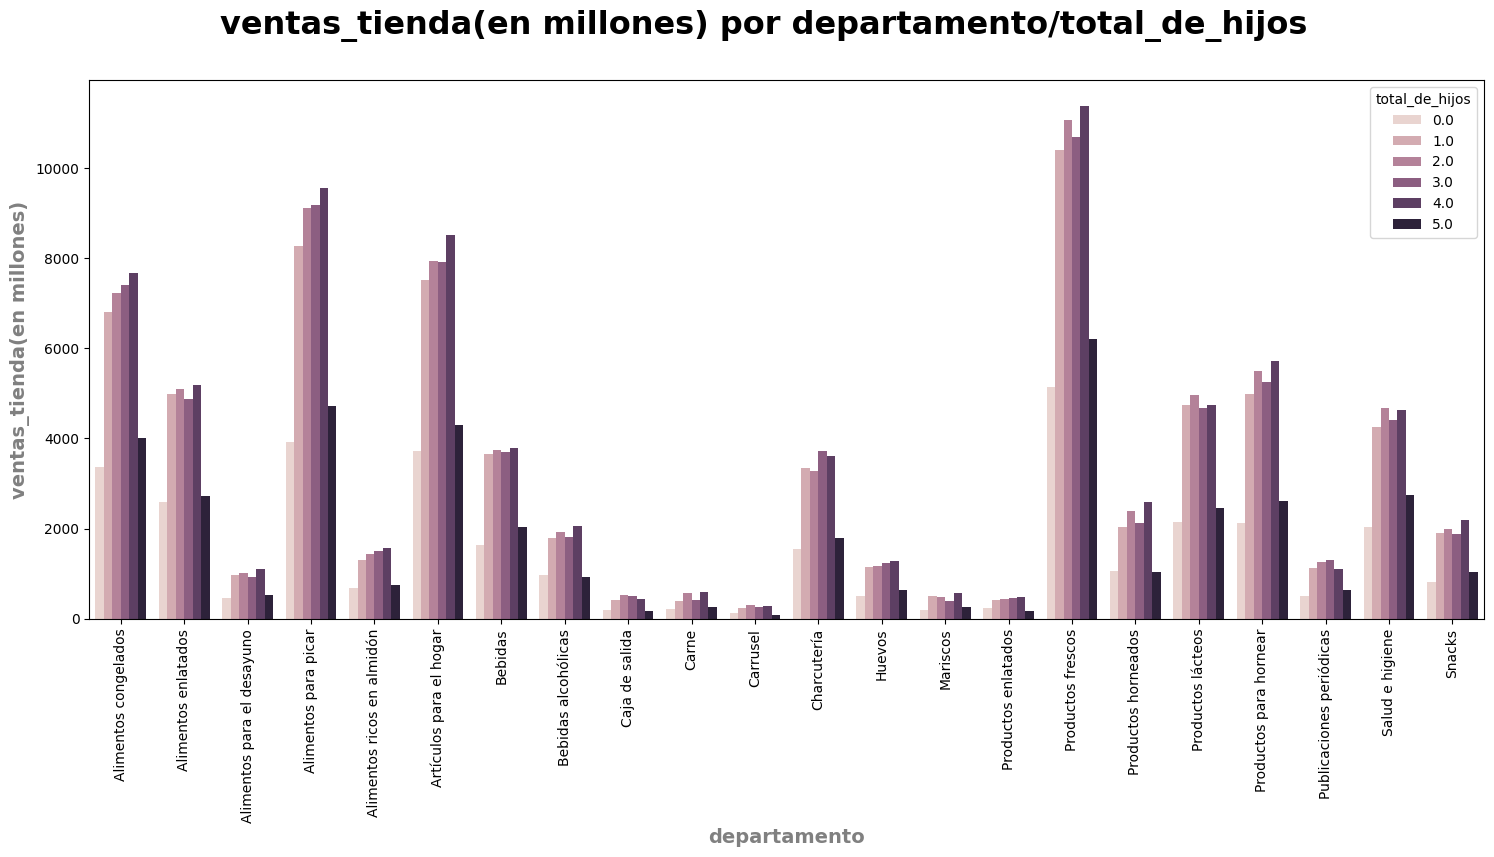

In [ ]:
grafica_barras(datos_sp, 'departamento', 'ventas_tienda(en millones)','total_de_hijos','magma')

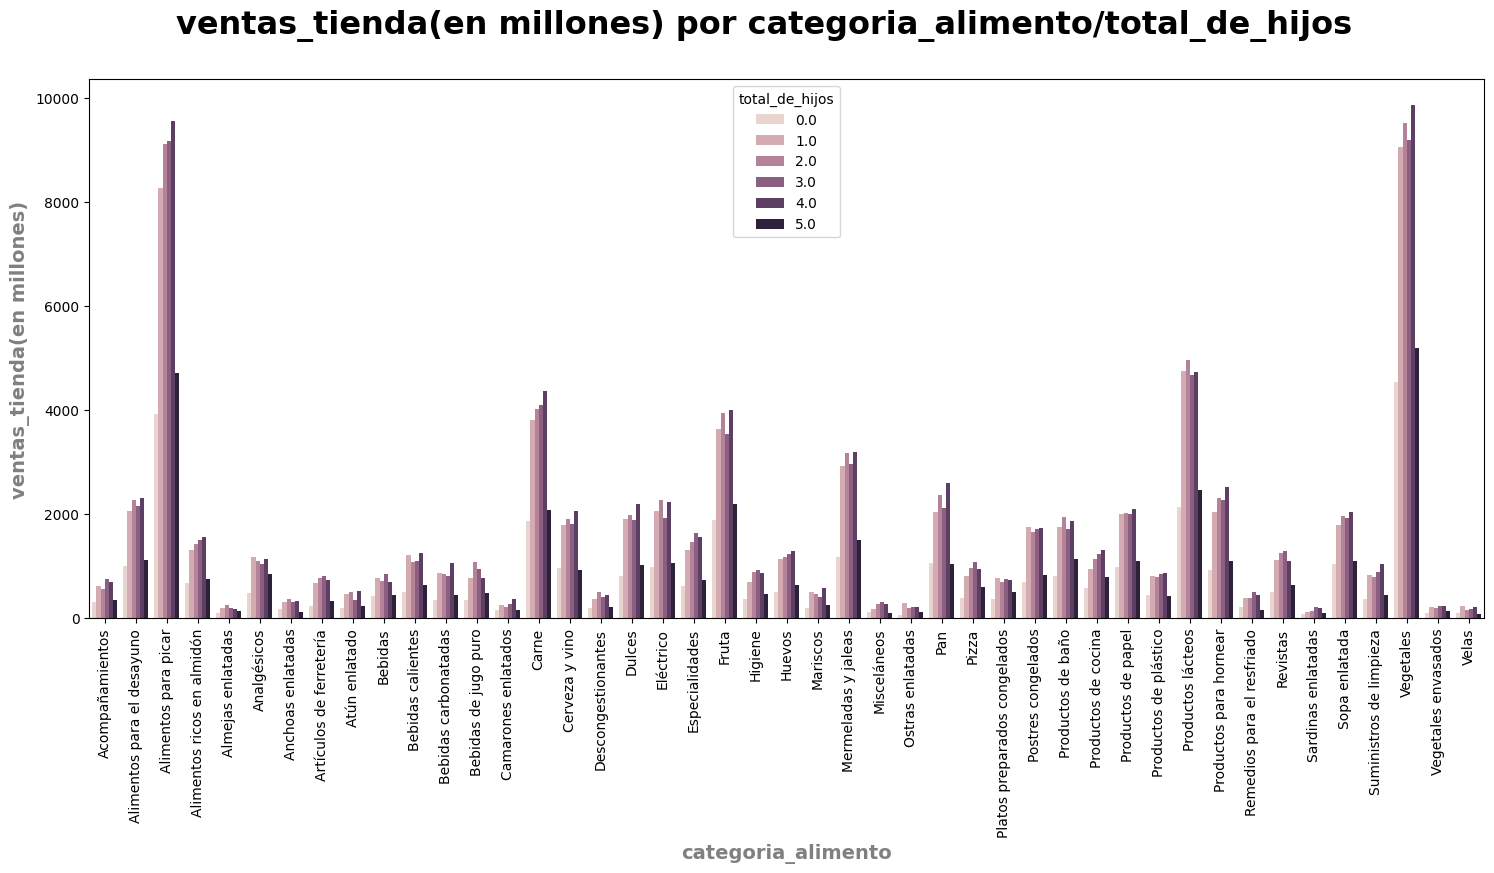

In [ ]:
grafica_barras(datos_sp, 'categoria_alimento', 'ventas_tienda(en millones)','total_de_hijos','magma')

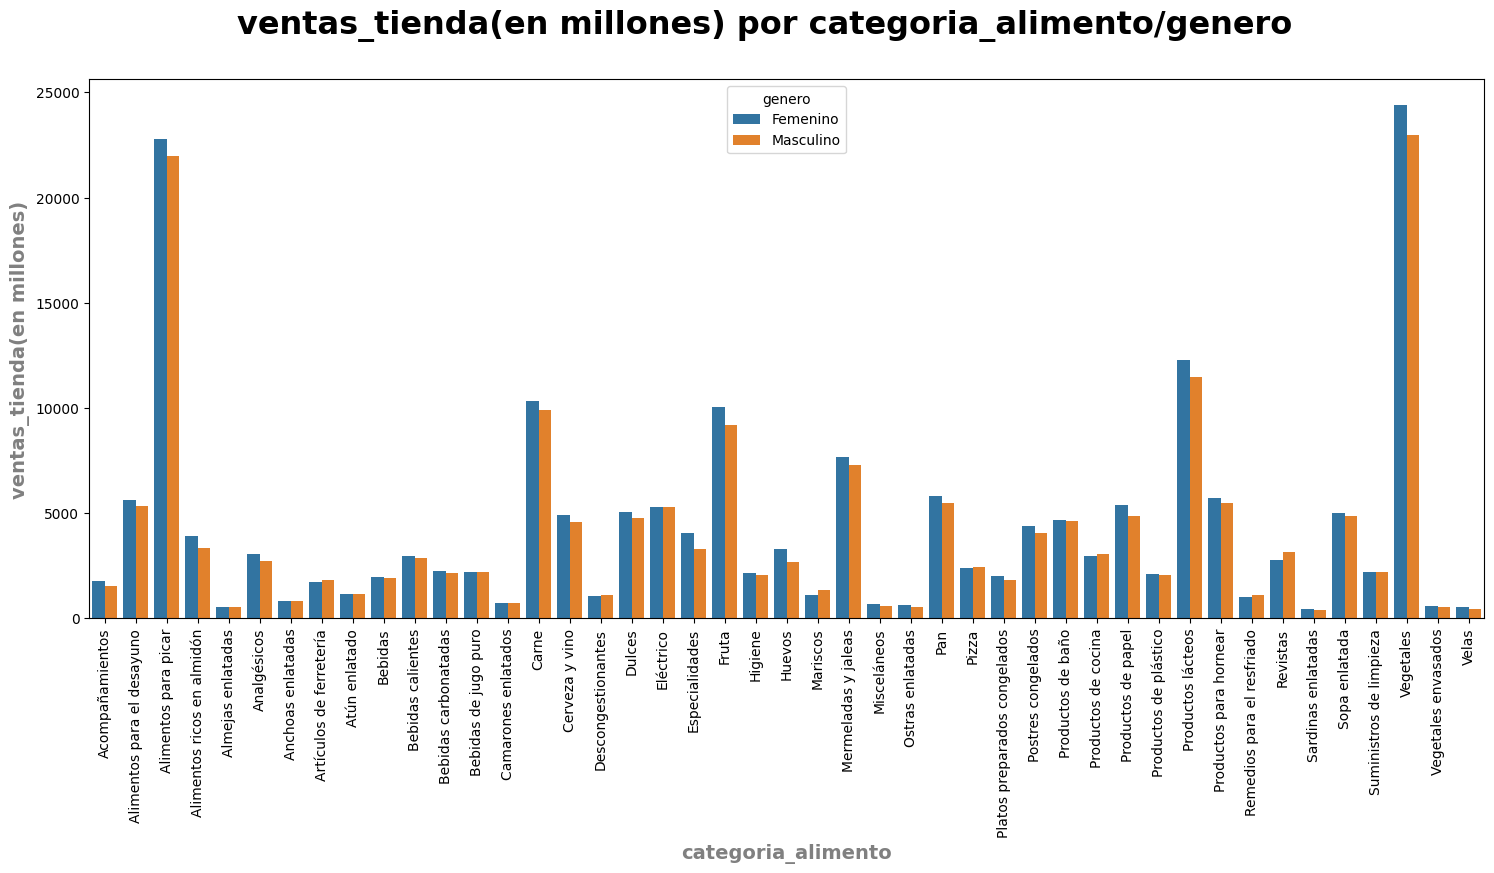

In [ ]:
grafica_barras(datos_sp, 'categoria_alimento', 'ventas_tienda(en millones)','genero','magma')

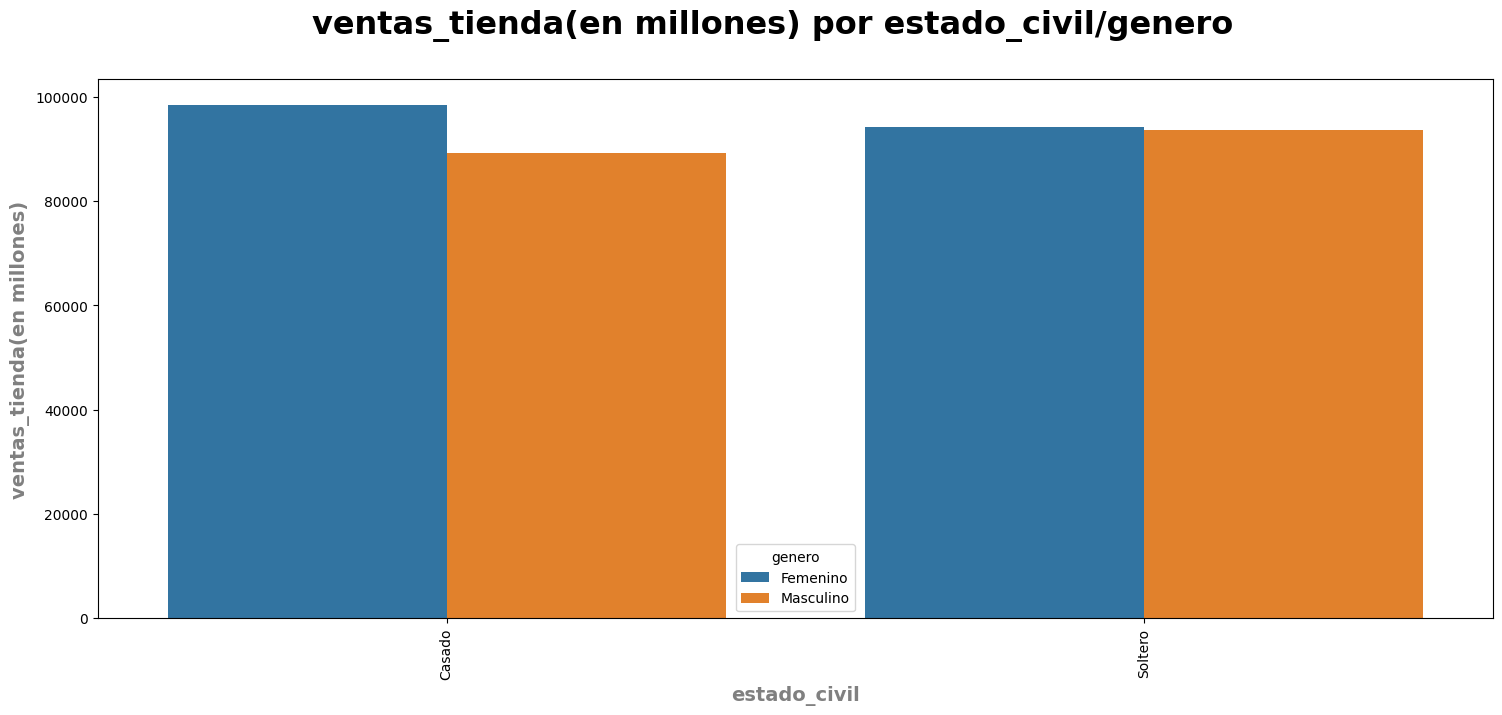

In [ ]:
grafica_barras(datos_sp, 'estado_civil', 'ventas_tienda(en millones)','genero','magma')

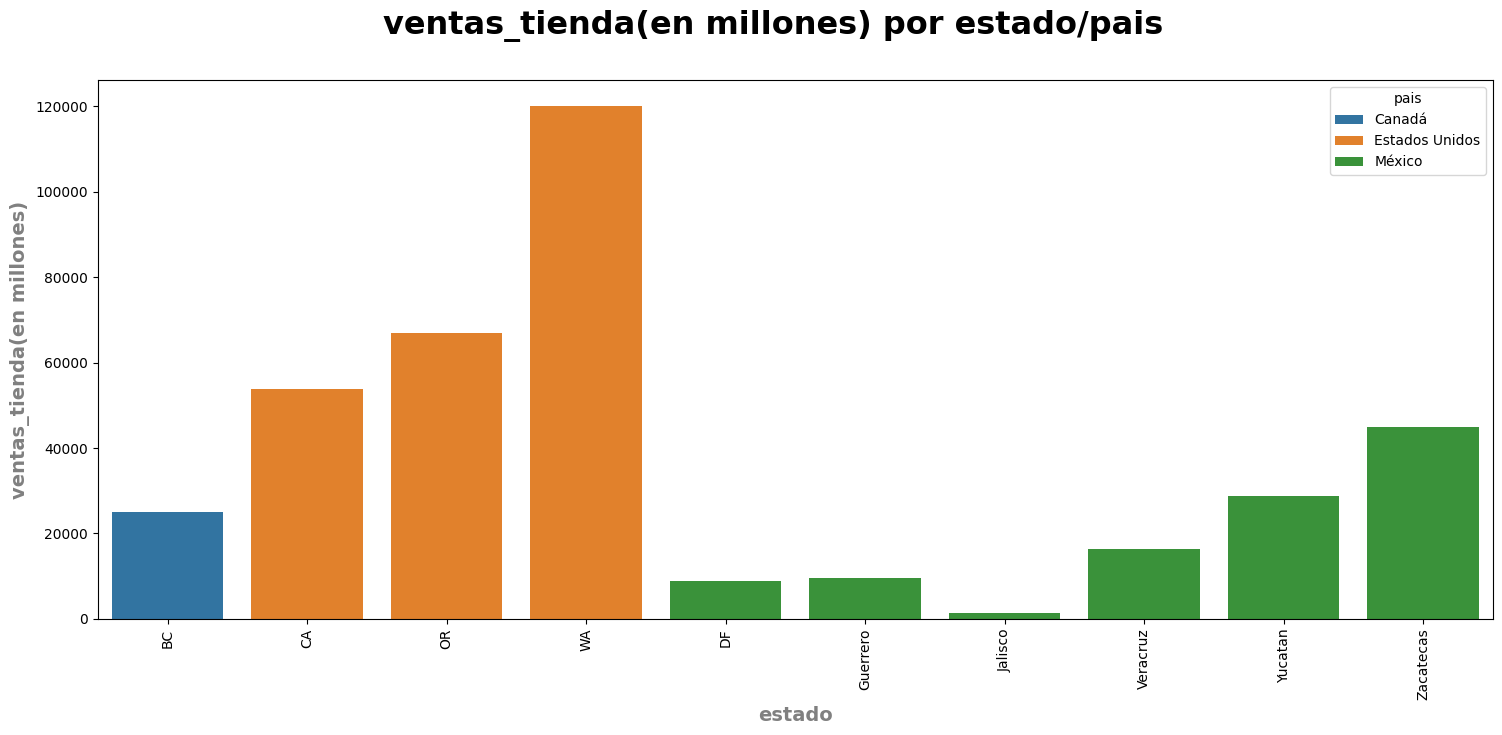

In [ ]:
grafica_barras(datos_sp, 'estado', 'ventas_tienda(en millones)','pais','magma')

<Axes: xlabel='count', ylabel='promocion'>

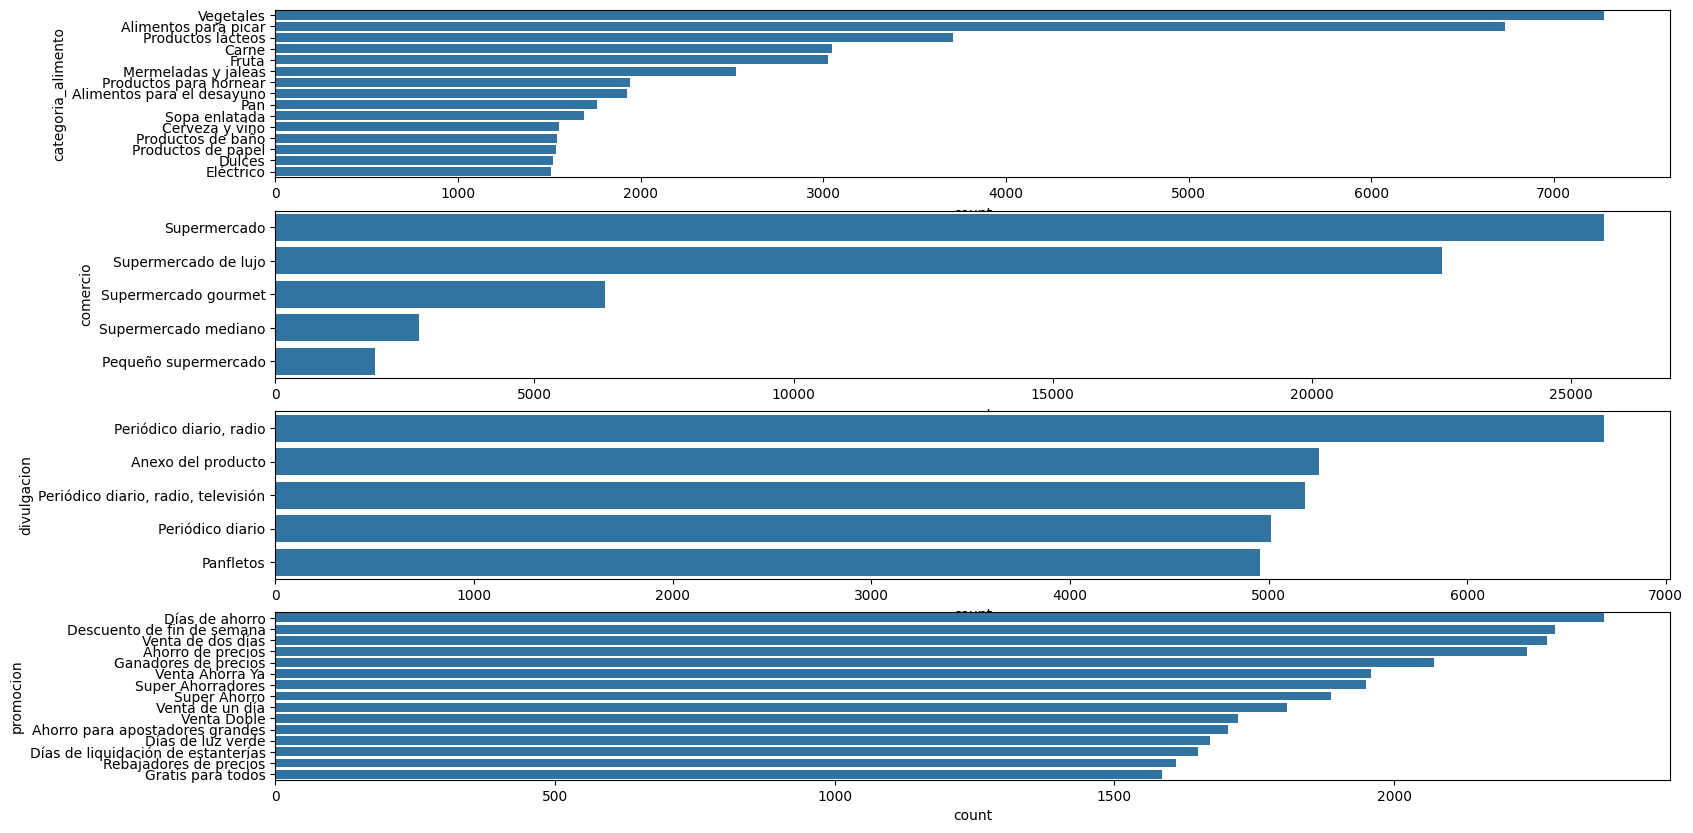

In [ ]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, figsize=(18, 10))

sns.countplot(data = datos_sp, y = "categoria_alimento",order = datos_sp.value_counts("categoria_alimento").head(15).index, ax= ax1);
sns.countplot(y='comercio', data= datos_sp, order = datos_sp.value_counts("comercio").head().index, ax= ax2)
sns.countplot(y='divulgacion', data= datos_sp, order = datos_sp.value_counts("divulgacion").head().index, ax= ax3)
sns.countplot(y='promocion', data= datos_sp, order = datos_sp.value_counts("promocion").head(15).index, ax= ax4)

<Axes: xlabel='count', ylabel='marca'>

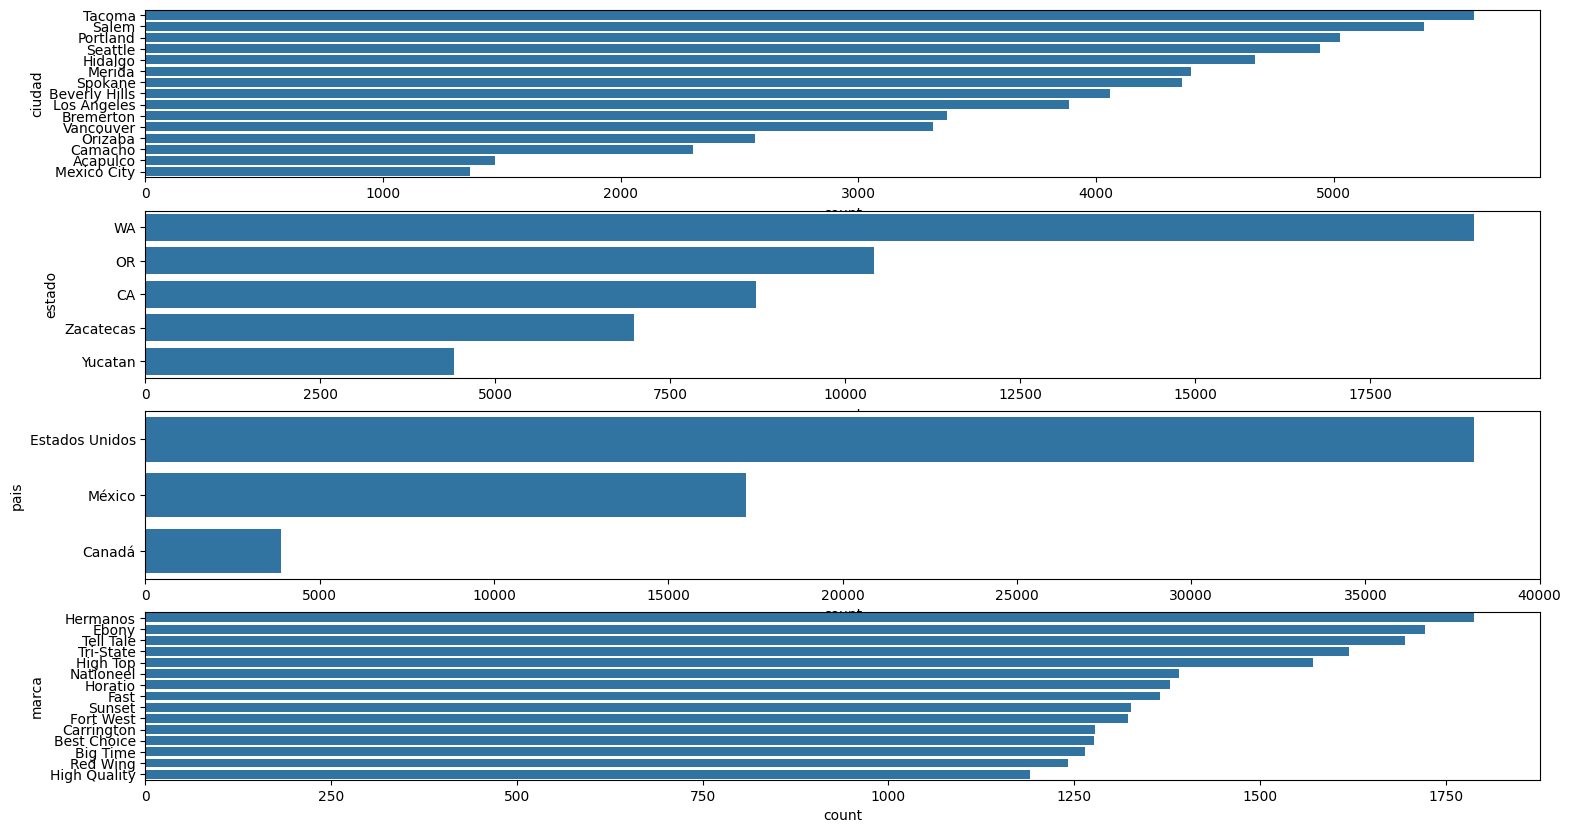

In [ ]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, figsize=(18, 10))

sns.countplot(data = datos_sp, y = "ciudad",order = datos_sp.value_counts("ciudad").head(15).index, ax= ax1);
sns.countplot(y='estado', data= datos_sp, order = datos_sp.value_counts("estado").head().index, ax= ax2)
sns.countplot(y='pais', data= datos_sp, order = datos_sp.value_counts("pais").head().index, ax= ax3)
sns.countplot(y='marca', data= datos_sp, order = datos_sp.value_counts("marca").head(15).index, ax= ax4)

<Axes: xlabel='count', ylabel='divulgacion'>

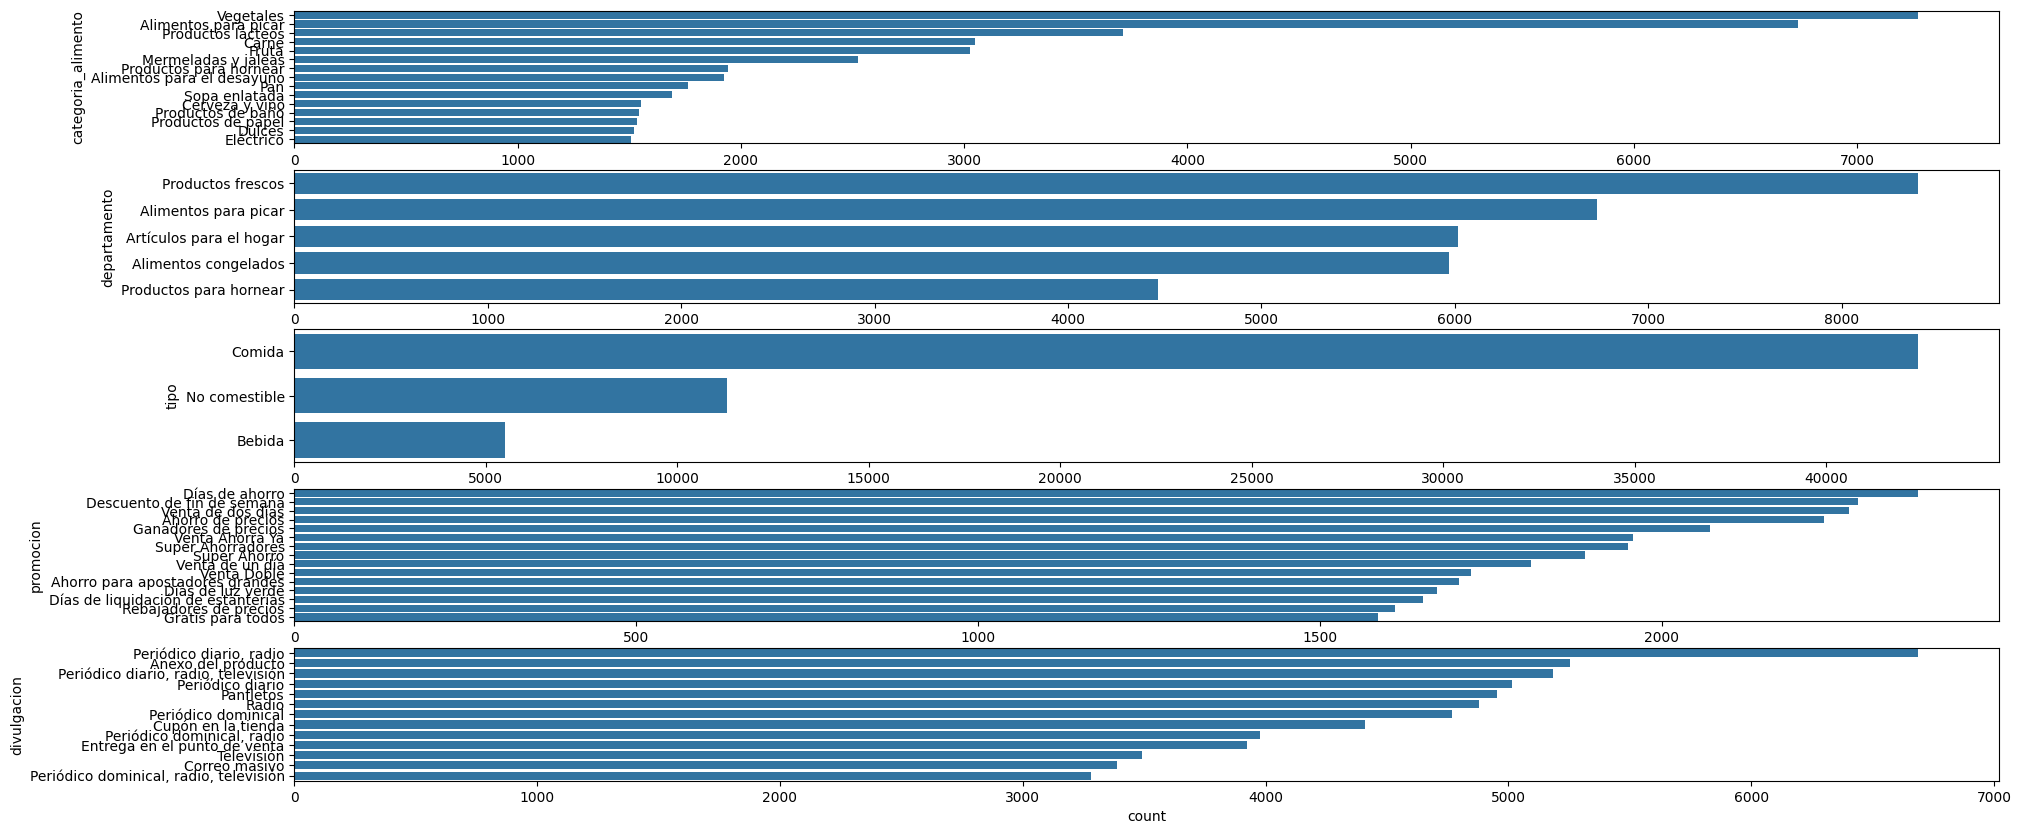

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(5, 1, figsize=(22, 10))

sns.countplot(data = datos_sp, y = "categoria_alimento",order = datos_sp.value_counts("categoria_alimento").head(15).index, ax= ax1);
sns.countplot(y='departamento', data= datos_sp, order = datos_sp.value_counts("departamento").head().index, ax= ax2)
sns.countplot(y='tipo', data= datos_sp, order = datos_sp.value_counts("tipo").head().index, ax= ax3)
sns.countplot(y='promocion', data= datos_sp, order = datos_sp.value_counts("promocion").head(15).index, ax= ax4)
sns.countplot(y='divulgacion', data= datos_sp, order = datos_sp.value_counts("divulgacion").head(15).index, ax= ax5)

In [ ]:
datos_sp.divulgacion.unique()

array(['Periódico diario, radio', 'Cupón en la tienda', 'Radio',
       'Periódico diario', 'Anexo del producto',
       'Periódico dominical, radio',
       'Periódico dominical, radio, televisión', 'Periódico dominical',
       'Panfletos', 'Televisión', 'Correo masivo',
       'Entrega en el punto de venta',
       'Periódico diario, radio, televisión'], dtype=object)

<Axes: xlabel='count', ylabel='tienda_de_videos'>

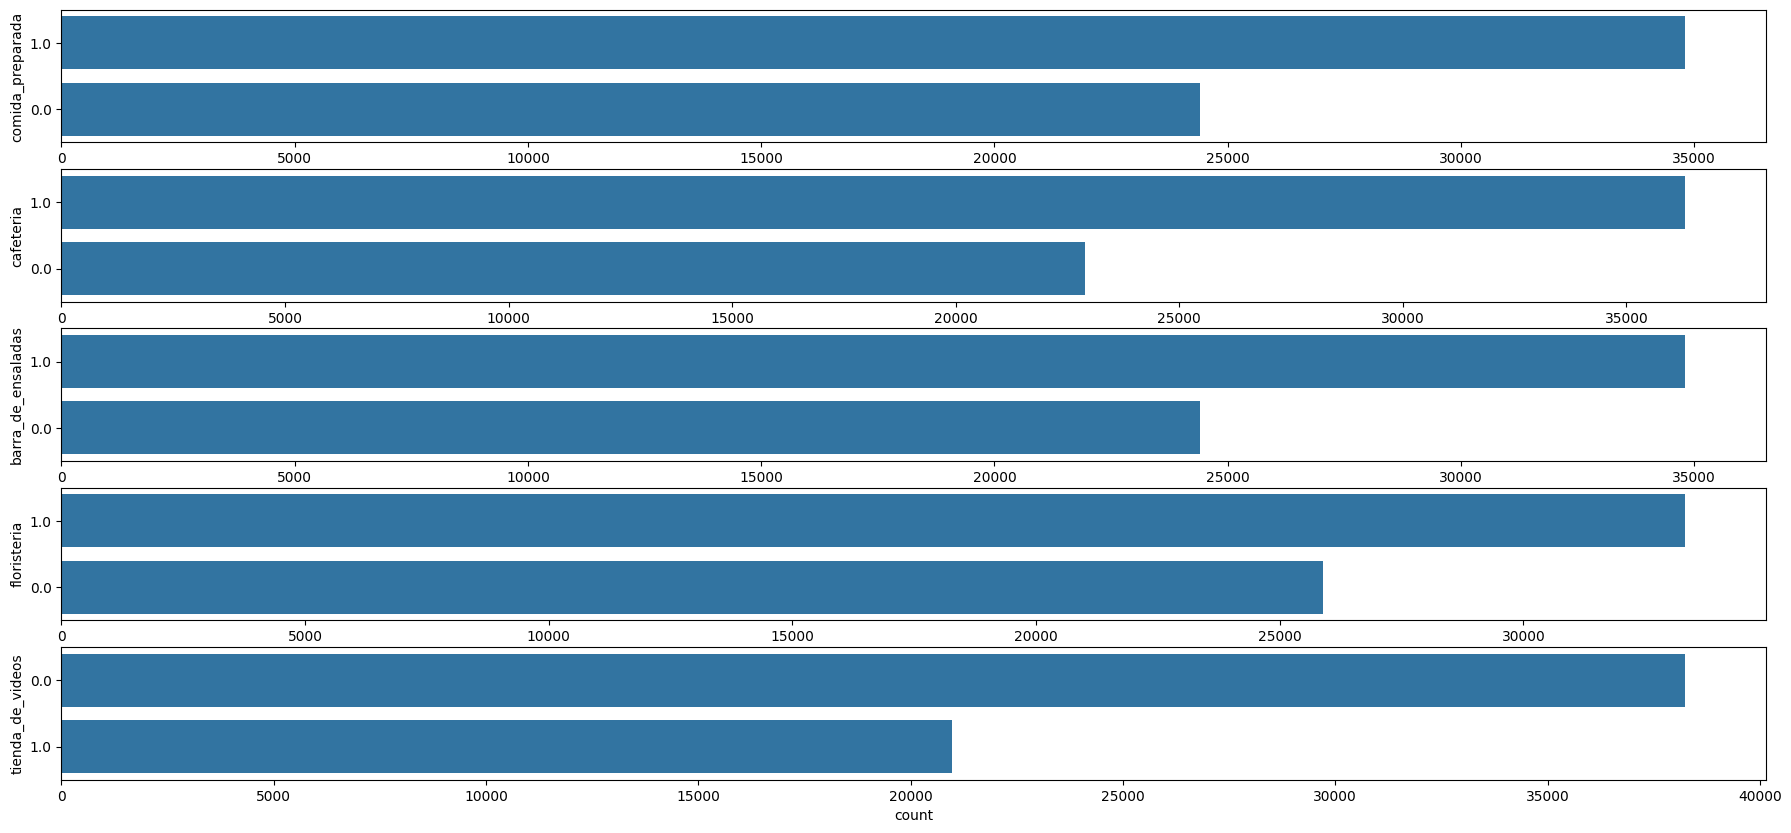

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(5, 1, figsize=(22, 10))

sns.countplot(data = datos_sp, y = "comida_preparada",order = datos_sp.value_counts("comida_preparada").head(15).index, ax= ax1);
sns.countplot(y='cafeteria', data= datos_sp, order = datos_sp.value_counts("cafeteria").head().index, ax= ax2)
sns.countplot(y='barra_de_ensaladas', data= datos_sp, order = datos_sp.value_counts("barra_de_ensaladas").head().index, ax= ax3)
sns.countplot(y='floristeria', data= datos_sp, order = datos_sp.value_counts("floristeria").head(15).index, ax= ax4)
sns.countplot(y='tienda_de_videos', data= datos_sp, order = datos_sp.value_counts("tienda_de_videos").head(15).index, ax= ax5)

##Función Gráfica de barras

In [ ]:
def graf_bar(df, var_x, var_y, var_cat, tema, texto):

  # configuración figura y gráficos 1 y 2
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,5)) #tamaño fig y graf1 y graf2
  fig.subplots_adjust(wspace=0.05)

  # Grafico 1
    #grafico y parámetros
  data = datos_sp.groupby([var_x, var_cat])[var_y].sum().reset_index() #data = agrupa var_cat y var_x, suma valores var_y y genera un nuevo index
  sns.barplot(x=var_x, y=var_y, hue=var_cat, data=data, palette=(tema), ax=ax1) #recibe data y los hiperparámetros del grafico
   #titulo grafico1
  ax1.set_title(f"{var_y} por {var_x} / {var_cat}",loc='left',fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
  ax1.set_xlabel(var_x) # etiqueta eje x
    #configuración lineas gráfico1
  ax1.spines['top'].set_color('none')
  ax1.spines['right'].set_color('none')

  #Gráfico 2
  ax2.text(0.07,0.3,texto,ha='left', fontdict= {'fontsize':11, 'color':'tab:blue'}) #define un texto
    #configuración lineas y ejes gráfico2
  ax2.get_yaxis().set_visible(False)
  ax2.get_xaxis().set_visible(False)
  ax2.spines['top'].set_color('none')
  ax2.spines['bottom'].set_color('none')
  ax2.spines['right'].set_color('none')


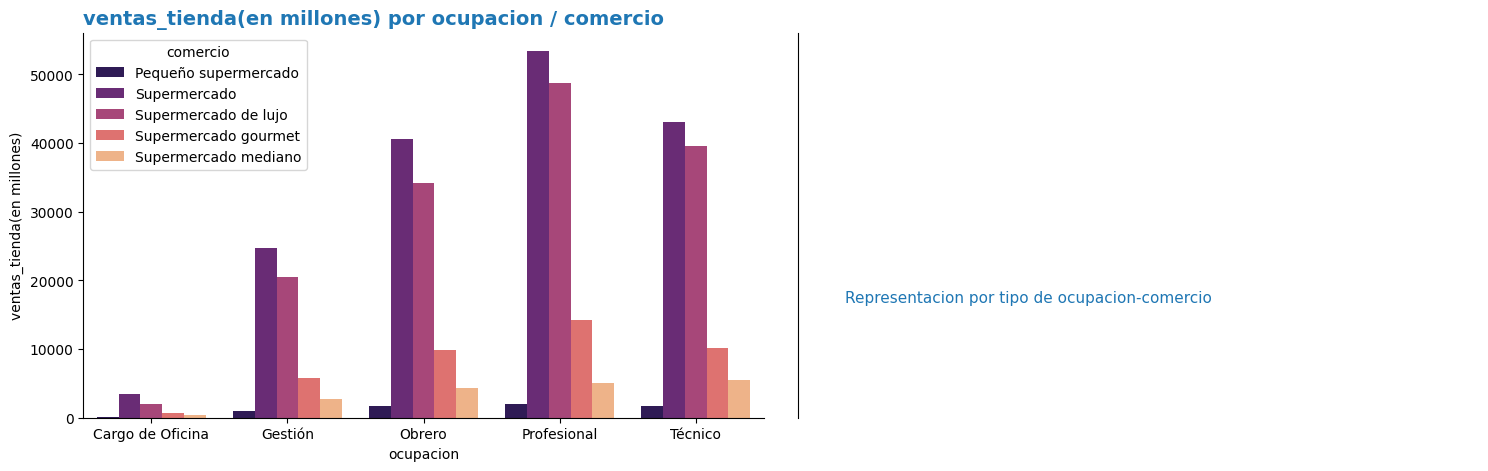

In [ ]:
texto1= ("Representacion por tipo de ocupacion-comercio")
graf_bar(datos_sp, 'ocupacion', 'ventas_tienda(en millones)', 'comercio', 'magma', texto1)

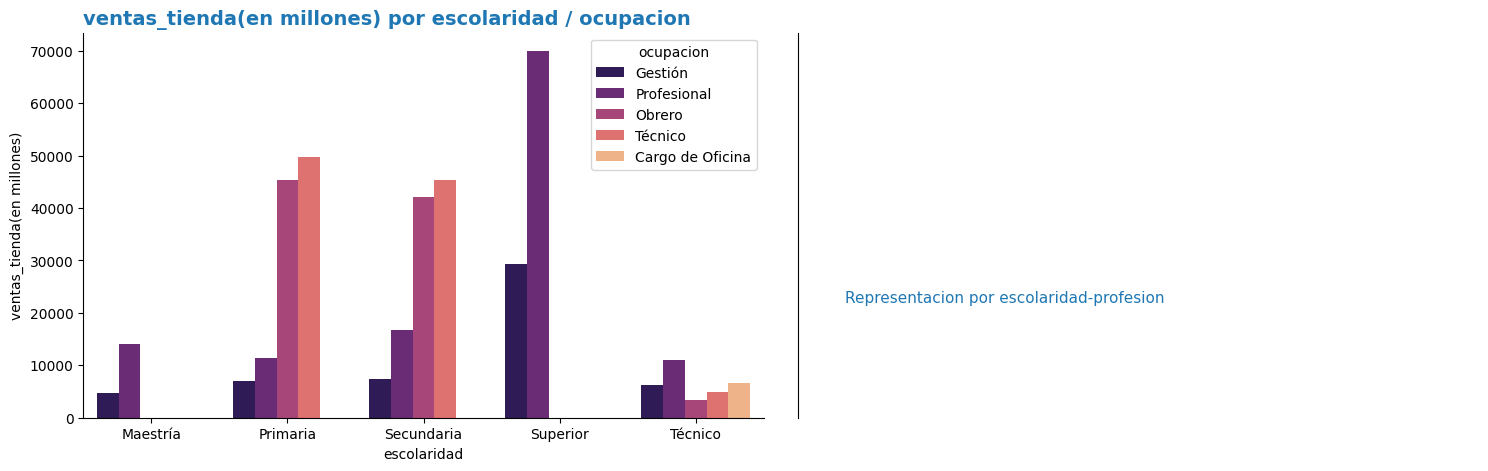

In [ ]:
texto1= ("Representacion por escolaridad-profesion")
graf_bar(datos_sp, 'escolaridad', 'ventas_tienda(en millones)', 'ocupacion', 'magma', texto1)

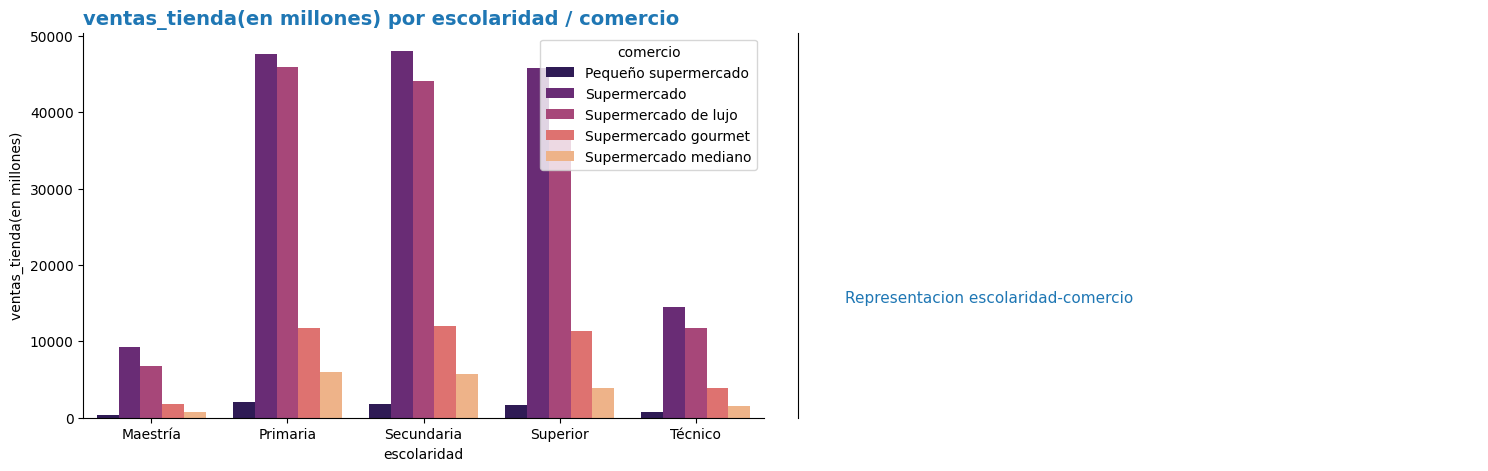

In [ ]:
texto1= ("Representacion escolaridad-comercio")
graf_bar(datos_sp, 'escolaridad', 'ventas_tienda(en millones)', 'comercio', 'magma', texto1)

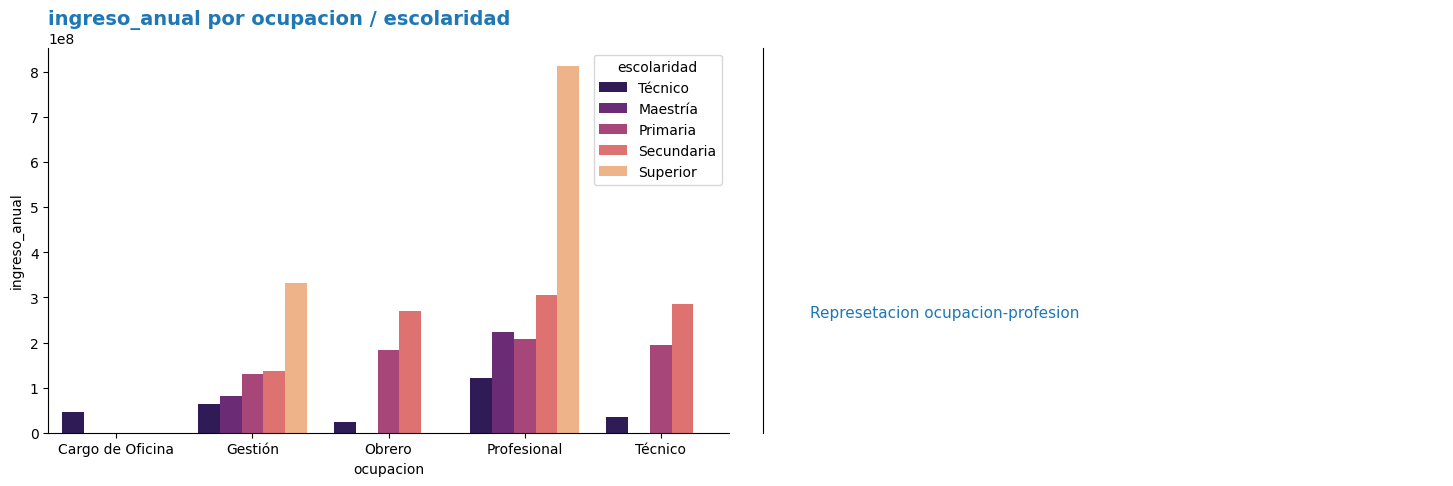

In [ ]:
texto1= ("Represetacion ocupacion-profesion")
graf_bar(datos_sp, 'ocupacion', 'ingreso_anual', 'escolaridad', 'magma', texto1)

##4.Preprocesamiento y obtención de features

In [ ]:
# dataset copia
datos_sp_seg = datos_sp.copy()
datos_sp_seg

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Sin membresia,Técnico,Sí,1.0,20000,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Sin membresia,Obrero,No,1.0,20000,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Especialidades,Carrusel,No comestible,2.76,1.3248,1.0,Días de ahorro,Estados Unidos,Casado,Femenino,1.0,Primaria,Sin membresia,Técnico,Sí,1.0,20000,1.0,ADJ,2.76,19.60,18.60,1.0,0.0,26.0,Pequeño supermercado,San Francisco,CA,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Cupón en la tienda,95.25
60424,Especialidades,Carrusel,No comestible,1.60,0.4960,1.0,Rebajando precios,Estados Unidos,Soltero,Femenino,2.0,Secundaria,Bronce,Técnico,No,2.0,40000,0.0,Symphony,1.60,17.40,15.30,1.0,0.0,36.0,Pequeño supermercado,San Francisco,CA,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Periódico dominical,69.42
60425,Especialidades,Carrusel,No comestible,5.52,2.5392,2.0,Descuento de fin de semana,Estados Unidos,Casado,Masculino,1.0,Secundaria,Bronce,Obrero,Sí,3.0,40000,0.0,ADJ,2.76,19.60,18.60,1.0,0.0,26.0,Pequeño supermercado,San Francisco,CA,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio, televisión",67.51
60426,Especialidades,Carrusel,No comestible,8.28,2.5668,3.0,Días de venta,Canadá,Soltero,Masculino,2.0,Superior,Bronce,Profesional,No,4.0,80000,0.0,ADJ,2.76,19.60,18.60,1.0,0.0,26.0,Supermercado mediano,Victoria,BC,34452.0,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Periódico dominical,132.88


In [ ]:
# diccionarios para sustituir valores y sustitución de valores en dataset copia
departamento_map = { 'Alimentos congelados':1, 'Productos horneados':2,
       'Alimentos enlatados':3, 'Productos para hornear':4,
       'Productos frescos':5, 'Snacks':6, 'Alimentos para picar':7,
       'Productos lácteos':8, 'Alimentos ricos en almidón':9,
       'Artículos para el hogar':10, 'Salud e higiene':11, 'Carne':12, 'Bebidas':13,
       'Mariscos':14, 'Charcutería':15, 'Bebidas alcohólicas':16,
       'Productos enlatados':17, 'Huevos':19, 'Publicaciones periódicas':20,
       'Alimentos para el desayuno':21, 'Caja de salida':22, 'Carrusel':23
    }

tipo_map = {
    'Comida':1, 'No comestible':2, 'Bebida':3
    }

escolaridad_map = {
    'Primaria': 1, 'Superior':4, 'Secundaria':2, 'Maestría':5, 'Técnico':3
    }

ocupacion_map = {
    'Técnico':1, 'Profesional':2, 'Obrero':3, 'Gestión':4, 'Cargo de Oficina':5
    }

membresia_map = {
    'Sin membresia':1, 'Plata':3, 'Bronce':2, 'Oro':4
    }

comercio_map = {
    'Supermercado de lujo':1, 'Supermercado':2, 'Supermercado gourmet':3,
       'Pequeño supermercado':4, 'Supermercado mediano':5
    }

divulgacion_map = {
    'Periódico diario, radio':1, 'Cupón en la tienda':2, 'Radio':3,
       'Periódico diario':4, 'Anexo del producto':5,
       'Periódico dominical, radio':6,
       'Periódico dominical, radio, televisión':7, 'Periódico dominical':8,
       'Panfletos':9, 'Televisión':10, 'Correo masivo':11,
       'Entrega en el punto de venta':12,
       'Periódico diario, radio, televisión':13
    }

estado_map = {
    'OR':1, 'WA':2, 'CA':3, 'Veracruz':4, 'Yucatan':5, 'Zacatecas':6, 'DF':7, 'BC':8,
       'Jalisco':9, 'Guerrero':10
}
pais_map = {
    'Estados Unidos':1, 'México':2, 'Canadá':3
    }

datos_sp_seg.departamento = datos_sp_seg.departamento.map(departamento_map)
datos_sp_seg.tipo = datos_sp_seg.tipo.map(tipo_map)
datos_sp_seg.escolaridad = datos_sp_seg.escolaridad.map(escolaridad_map)
datos_sp_seg.ocupacion = datos_sp_seg.ocupacion.map(ocupacion_map)
datos_sp_seg.membresia = datos_sp_seg.membresia.map(membresia_map)
datos_sp_seg.comercio = datos_sp_seg.comercio.map(comercio_map)
datos_sp_seg.divulgacion = datos_sp_seg.divulgacion.map(divulgacion_map)
datos_sp_seg.estado = datos_sp_seg.estado.map(estado_map)
datos_sp_seg.pais = datos_sp_seg.pais.map(pais_map)

In [ ]:
datos_sp_seg.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
20955,Productos de cocina,10,2,3.87,1.2771,3.0,Descuento de fin de semana,1,Soltero,Masculino,0.0,2,2,1,No,4.0,40000,0.0,Red Wing,1.29,8.03,5.02,1.0,0.0,30.0,2,Portland,1,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,9,117.40
33629,Mermeladas y jaleas,4,1,11.12,4.4480,4.0,Días de venta,2,Soltero,Masculino,4.0,2,2,1,Sí,2.0,40000,0.0,BBB Best,2.78,6.49,5.48,0.0,0.0,23.0,1,Merida,5,30797.0,20141.0,6393.0,4262.0,1.0,1.0,1.0,1.0,1.0,13,116.40
58733,Productos lácteos,8,1,7.96,3.0248,2.0,Rebajadores de precios,2,Soltero,Femenino,1.0,3,4,5,Sí,2.0,40000,0.0,Booker,3.98,20.90,18.80,0.0,0.0,12.0,2,Acapulco,10,23593.0,17475.0,3671.0,2447.0,0.0,0.0,0.0,0.0,0.0,9,52.97
14161,Productos lácteos,8,3,1.32,0.4620,2.0,Recortadores de dólares,1,Soltero,Femenino,3.0,1,1,3,No,2.0,20000,0.0,Carlson,0.66,9.78,7.77,1.0,0.0,13.0,1,Tacoma,2,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,6,136.74
37839,Artículos de ferretería,10,2,7.86,2.6724,3.0,Super Ahorradores,1,Soltero,Masculino,3.0,4,2,2,No,3.0,60000,0.0,High Quality,2.62,7.64,5.63,1.0,0.0,30.0,2,Seattle,2,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,6,80.00


In [ ]:
foodmart = datos_sp_seg[['departamento','tipo','ventas_tienda(en millones)', 'escolaridad','ocupacion','ingreso_anual', 'total_de_hijos','membresia','comercio', 'divulgacion','estado', 'pais']]
foodmart.sample(10)

,departamento,tipo,ventas_tienda(en millones),escolaridad,ocupacion,ingreso_anual,total_de_hijos,membresia,comercio,divulgacion,estado,pais
29414,15,1,1.56,1,1,40000,0.0,2,1,3,6,2
28797,10,2,5.67,1,1,20000,5.0,1,1,12,6,2
43453,7,1,6.72,4,4,60000,5.0,2,2,1,2,1
15797,4,1,9.52,4,2,60000,0.0,2,3,9,6,2
46964,6,1,5.84,3,2,40000,2.0,2,1,2,2,1
14926,8,3,2.58,1,1,20000,4.0,2,4,5,9,2
47962,1,1,7.75,1,2,100000,2.0,2,2,12,1,1
22799,16,3,1.71,1,1,20000,4.0,1,1,9,2,1
25326,5,1,4.94,4,2,60000,0.0,2,2,13,2,1
51048,11,2,9.52,2,3,40000,4.0,2,2,10,2,1


In [ ]:
foodmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59215 entries, 0 to 60427
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   departamento                59215 non-null  int64  
 1   tipo                        59215 non-null  int64  
 2   ventas_tienda(en millones)  59215 non-null  float64
 3   escolaridad                 59215 non-null  int64  
 4   ocupacion                   59215 non-null  int64  
 5   ingreso_anual               59215 non-null  int64  
 6   total_de_hijos              59215 non-null  float64
 7   membresia                   59215 non-null  int64  
 8   comercio                    59215 non-null  int64  
 9   divulgacion                 59215 non-null  int64  
 10  estado                      59215 non-null  int64  
 11  pais                        59215 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 5.9 MB


<Axes: >

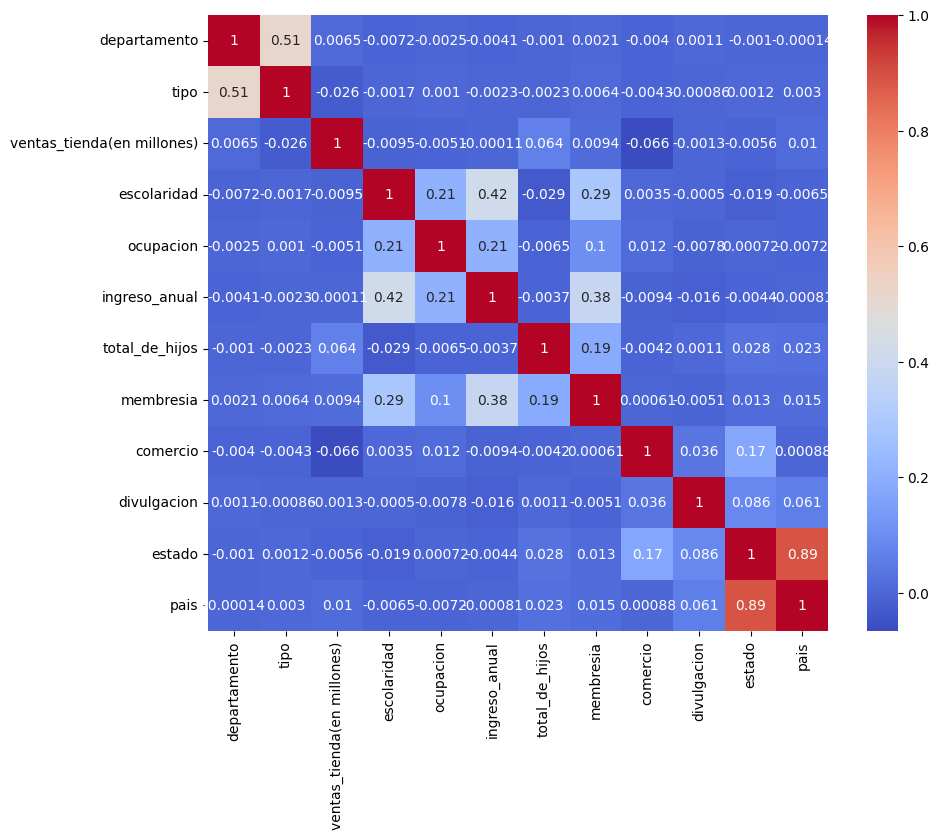

In [ ]:
corr_matrix = foodmart[['departamento', 'tipo', 'ventas_tienda(en millones)', 'escolaridad',
       'ocupacion', 'ingreso_anual', 'total_de_hijos', 'membresia', 'comercio',
       'divulgacion', 'estado', 'pais']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
#Stardard scaler:
  # Toma la media y la divide entre el desvio tipico, de modo que trae todos los valores  a la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(foodmart) #fit_transform: ajusta los datos al modelo para luego estandarizarlos
X_std = pd.DataFrame(X_scaled)

##5.Clusterización y validación

El algoritmo utilizado para la clusterización es KMeans.

###5.1.Validando el número de clusters

La validación del número de cluster consiste en instanciar de 3-10 clusters con *KMeans*.

Las puntajes de los clusters se calculan a través de las métricas 'Silhouette', 'Davies-Bouldin' y 'Calinski and Harabasz'. Los resultados son almacenados en una variable denominada 'X_std'.

**OBSERVACIONES:**

Para decidir la mejor configuración para el número de clusters se consideró:

- *Inercia*:

Cuanto menor sea la inercia, mejor. Indica que las muestras están más cerca de los centroides de sus clusters respectivos.

- *Silhouette*: puntaje minimo debe ser de 0.50;

Cerca de 0: Indica que la muestra está en o muy cerca del límite de decisión entre dos clusters.
- *Davies-Bouldin*: máximo de 0.75;  

Valores más bajos indican clusters mejor definidos.
El valor óptimo es 0, que indica una buena separación entre clusters.
- *CalinskiHarabasz*: el número más alto posible.

Cuanto mayor sea el valor, mejor, ya que indica una mayor separación entre los clusters y una mayor cohesión dentro de los clusters.

In [ ]:
def get_metrics(dataset):
  # Lista para almacenar los resultados
    scores = []
  # Rango de clusters de 3 a 10
    for n_clusters in range(3, 11):
      # Instancia el modelo de KMeans con la configuración seleccionada
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
      # Ajusta el modelo a tus datos
        kmeans.fit(dataset)
      # Calcula las métricas
        silhouette = silhouette_score(dataset, kmeans.labels_)
        inercia = kmeans.inertia_
        davies_bouldin = davies_bouldin_score(dataset, kmeans.labels_)
        calinski_harabasz = calinski_harabasz_score(dataset, kmeans.labels_)
      # Almacena los resultados en la lista
        scores.append({
            'Clusters': n_clusters,
            'Inercia': inercia,
            'Silhouette': silhouette,
            'Davies-Bouldin': davies_bouldin,
            'Calinski-Harabasz': calinski_harabasz
        })

    cluster_scores = pd.DataFrame(scores)
    return cluster_scores

In [ ]:
df_Xstd = get_metrics(X_std)
df_Xstd

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,562141.722054,0.105157,2.321612,7817.716389
1,4,524472.280075,0.102875,2.085913,7003.668668
2,5,493637.067607,0.115640,2.098187,6505.410796
3,6,472727.980670,0.116741,2.079120,5958.184819
4,7,457668.565747,0.106414,2.162106,5453.145180
5,8,441749.347293,0.107063,2.190251,5147.285492
6,9,429284.737393,0.108484,2.133413,4849.455242
7,10,418541.336179,0.110104,2.067236,4590.059960


- El mejor cluster es 6:

###5.2.Evaluando la estructura

La evaluación de la estructura de los clusters consiste en la comparación del dataset 'X_std' con 'random_data'. 'random_data' es una baseline generada con el modulo random(numpy), que genera números aleatorios y que presenta la misma dimensión de datos que 'X_std'.

El objetivo es asegurarse que los puntajes obtenidos en 'X_std' tengan un mejor desempeño respecto a 'random_data'.

In [ ]:
x_data = np.random.rand(*X_std.shape) #datos metrica
random_data = get_metrics(x_data)
random_data

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,53236.569840,0.052867,3.441013,3330.892150
1,4,51409.591166,0.053456,3.353437,3000.865216
2,5,50076.008136,0.051648,3.079117,2704.756383
3,6,48895.218543,0.052220,2.827466,2501.989955
4,7,47842.228408,0.052735,2.721165,2348.032684
5,8,46886.131608,0.053550,2.604016,2226.080003
6,9,46107.050861,0.053347,2.520618,2105.752513
7,10,45345.944752,0.053592,2.467122,2013.574022


In [ ]:
# función para comparar performance de las metricas
def compare_metrics(df1, df2, label1='Set 1', label2='Set 2'):
    # Obtén el número de clusters y las métricas para ambos conjuntos
    clusters1, inercia1, silhouette_scores1, davies_bouldin_scores1, calinski_harabasz_scores1 = (
        df1['Clusters'],
        df1['Inercia'],
        df1['Silhouette'],
        df1['Davies-Bouldin'],
        df1['Calinski-Harabasz']
    )

    clusters2, inercia2, silhouette_scores2, davies_bouldin_scores2, calinski_harabasz_scores2 = (
        df2['Clusters'],
        df2['Inercia'],
        df2['Silhouette'],
        df2['Davies-Bouldin'],
        df2['Calinski-Harabasz']
    )

    plt.figure(figsize=(18, 8))

     # Gráfico de Inercia
    plt.subplot(2, 2, 1)
    plt.plot(clusters1, inercia1, marker='o', label=label1)
    plt.plot(clusters2, inercia2, marker='o', label=label2)
    plt.title('Inercia Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.legend()

    # Gráfico de Silhouette Score
    plt.subplot(2, 2, 2)
    plt.plot(clusters1, silhouette_scores1, marker='o', label=label1)
    plt.plot(clusters2, silhouette_scores2, marker='o', label=label2)
    plt.title('Silhouette Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.legend()

    # Gráfico de Davies-Bouldin Score
    plt.subplot(2, 2, 3)
    plt.plot(clusters1, davies_bouldin_scores1, marker='o', label=label1)
    plt.plot(clusters2, davies_bouldin_scores2, marker='o', label=label2)
    plt.title('Davies-Bouldin Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.legend()

    # Gráfico de Calinski and Harabasz Score
    plt.subplot(2, 2, 4)
    plt.plot(clusters1, calinski_harabasz_scores1, marker='o', label=label1)
    plt.plot(clusters2, calinski_harabasz_scores2, marker='o', label=label2)
    plt.title('Calinski-Harabasz Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.legend()

    # Ajusta el diseño y muestra los gráficos
    plt.tight_layout()
    plt.show()

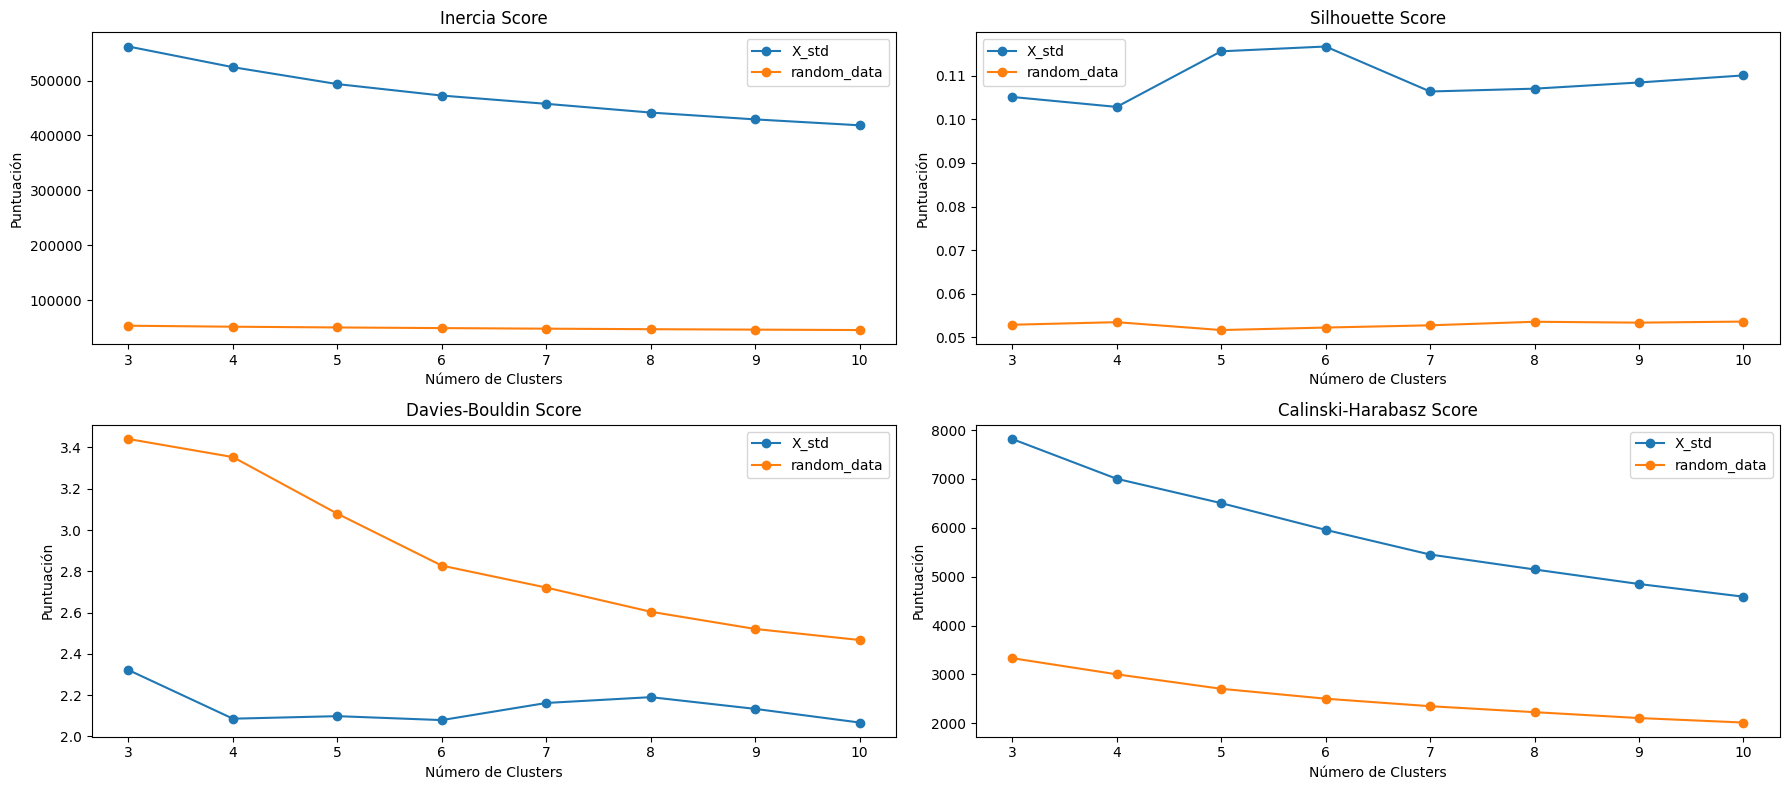

In [ ]:
compare_metrics(df_Xstd, random_data, label1='X_std', label2='random_data')

###5.3.Evaluando la estabilidad

La estabilidad de los clusters se evalua comparando los puntajes obtenidos para las metricas con el dataset X_std. Para ello, se segmeta el dataset X_std en 5 partes igualesusando la función array_split().

Cada fragmento del dataset es almacenada en variables (set_1, set_2,... set_5), seguido de esto se repite el proceso de validación para cada cluster. Lo importante es que los puntajes no presenten una variación mayor a ±5% entre sí. Esto garantiza la homogeneidad en la composición de los clusters.

In [ ]:
# Usa array_split para dividir X_std en 5 partes iguales
sets = np.array_split(X_std, 5)

# Almacena cada fragmento en variables set_1, set_2, ..., set_5
for i, set_data in enumerate(sets, start=1):
    locals()[f'set_{i}'] = set_data

In [ ]:
df_Xstd

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,562141.722054,0.105157,2.321612,7817.716389
1,4,524472.280075,0.102875,2.085913,7003.668668
2,5,493637.067607,0.115640,2.098187,6505.410796
3,6,472727.980670,0.116741,2.079120,5958.184819
4,7,457668.565747,0.106414,2.162106,5453.145180
5,8,441749.347293,0.107063,2.190251,5147.285492
6,9,429284.737393,0.108484,2.133413,4849.455242
7,10,418541.336179,0.110104,2.067236,4590.059960


In [ ]:
get_metrics(set_1)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,90719.702022,0.124770,2.069418,1932.861411
1,4,84329.308382,0.141018,2.052397,1685.153167
2,5,79255.772083,0.143938,2.027397,1534.110970
3,6,75514.605171,0.144483,2.022916,1405.266891
4,7,72236.975697,0.147428,1.938130,1313.593569
5,8,69150.915695,0.134593,1.954194,1251.541215
6,9,67184.339771,0.124669,1.896364,1170.356246
7,10,65277.401497,0.119191,1.899638,1109.025420


In [ ]:
get_metrics(set_2)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,113096.331016,0.147130,2.117996,1812.020902
1,4,105762.407621,0.110286,2.043019,1565.329666
2,5,100020.071493,0.122606,2.053504,1411.201191
3,6,95208.082372,0.127077,2.068681,1305.572721
4,7,91712.547737,0.112786,2.091309,1204.534964
5,8,88527.278375,0.114773,2.077526,1130.352366
6,9,85830.125774,0.117134,2.102389,1066.535458
7,10,83773.361133,0.104535,2.136187,1003.508381


In [ ]:
get_metrics(set_3)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,105537.792868,0.114403,2.244087,1662.446307
1,4,99216.047445,0.125201,2.216361,1430.268640
2,5,93140.154237,0.121982,2.110783,1335.637317
3,6,88659.837171,0.124109,2.033438,1242.044887
4,7,85245.574349,0.124362,2.064075,1155.412101
5,8,82523.795671,0.111278,2.096238,1078.692669
6,9,79890.779857,0.114404,2.042334,1023.632801
7,10,78052.770150,0.107299,2.044434,962.209715


In [ ]:
get_metrics(set_4)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,111696.631056,0.124144,2.275153,1587.987287
1,4,104436.141200,0.098119,2.090644,1406.516115
2,5,98191.821240,0.112546,2.099586,1310.081459
3,6,94088.345113,0.109846,2.062374,1196.929443
4,7,90640.466410,0.113166,2.148926,1110.334831
5,8,87499.447488,0.111851,2.163649,1046.487916
6,9,84909.630201,0.113794,2.117539,988.644435
7,10,82772.899486,0.102202,2.122134,935.345426


In [ ]:
get_metrics(set_5)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,115470.115384,0.102159,2.370634,1511.613495
1,4,108732.820111,0.096163,2.216970,1314.621524
2,5,103931.157789,0.115425,2.289941,1168.157893
3,6,98384.408904,0.108237,2.239061,1120.601674
4,7,94644.811560,0.109242,2.166528,1048.595354
5,8,91566.677627,0.101188,2.185284,985.766142
6,9,89023.350109,0.099821,2.186176,929.372019
7,10,86751.724839,0.098423,2.153880,882.098350


###5.4.Instanciando la mejor configuración de clusters

In [ ]:
# Asginanción de clusters a clientes
datos_raw = pd.DataFrame(data=datos_sp) #nuevo dataframe con datos de clientes
num_clusters = 7 # clusters a instanciar
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42) # instanciando modelo KMeans para 7 clusters
cluster_labels = kmeans_model.fit_predict(X_std) # entrenando modelo con datos estandarizados para obtener las etiquetas de los clusters
datos_raw['cluster'] = cluster_labels #nuevo atributo, asigna la etiqueta del cluster correspondiente para cada cliente

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# modificando el orden de los atributos
column_order = ['cluster'] + [col for col in datos_raw if col != 'cluster'] #lista que posiciona 'cluster' como primer atributo
datos_raw = datos_raw[column_order] #aplicamos la lista al dataframe

In [ ]:
datos_raw.sample(5)

,cluster,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
19762,1,Alimentos para picar,Alimentos para picar,Comida,7.35,2.7930,3.0,Tres por uno,Estados Unidos,Casado,Femenino,3.0,Técnico,Bronce,Técnico,Sí,3.0,40000,3.0,Nationeel,2.45,8.95,6.94,0.0,0.0,25.0,Supermercado,Bremerton,WA,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Periódico dominical,118.25
21178,2,Carne,Charcutería,Comida,2.88,1.3536,4.0,Venta Ahorra Ya,Estados Unidos,Soltero,Masculino,2.0,Secundaria,Bronce,Técnico,No,3.0,40000,0.0,Cutting Edge,0.72,19.60,17.60,1.0,1.0,24.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,144.38
3794,3,Vegetales,Productos frescos,Comida,5.19,1.7646,3.0,Super Ahorro,Estados Unidos,Casado,Masculino,4.0,Superior,Bronce,Profesional,No,3.0,80000,1.0,Hermanos,1.73,15.20,12.10,0.0,1.0,32.0,Supermercado,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,"Periódico dominical, radio",64.76
53165,4,Higiene,Salud e higiene,No comestible,6.40,2.3680,4.0,Super Ahorro,Canadá,Soltero,Masculino,5.0,Superior,Bronce,Profesional,No,3.0,80000,0.0,Hilltop,1.60,19.80,17.70,1.0,0.0,29.0,Supermercado de lujo,Vancouver,BC,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Panfletos,144.54
27464,3,Carne,Alimentos congelados,Comida,6.92,2.5604,2.0,Super Ahorro,Estados Unidos,Casado,Femenino,3.0,Maestría,Bronce,Profesional,No,4.0,100000,2.0,Imagine,3.46,11.00,8.00,0.0,1.0,24.0,Supermercado,Spokane,WA,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio",64.99


###5.5.Dispersión de los clusters

In [ ]:
datos_raw.columns

Index(['cluster', 'categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'membresia', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos', 'marca', 'precio_recomendado', 'peso_bruto',
       'peso_neto', 'empaque_reciclable', 'bajo_en_grasa', 'unidades_por_caja',
       'comercio', 'ciudad', 'estado', 'pies_cuadrados_tienda',
       'pies_cuadrados_comestibles', 'pies_cuadrados_congelados',
       'pies_cuadrados_carne', 'cafeteria', 'tienda_de_videos',
       'barra_de_ensaladas', 'comida_preparada', 'floristeria', 'divulgacion',
       'costo'],
      dtype='object')

In [ ]:
# Función gráfico de dispersión: toma dos atributos y los gráfica, según su agrupación por cluster
def dispersion(x, y, palette):
    sns.scatterplot(x=x, y=y, hue='cluster', data=datos_raw, palette=palette)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Distribución de clusters: {} - {}'.format(x, y))
    plt.show()

#####5.5.1.Dispersión por membresia:

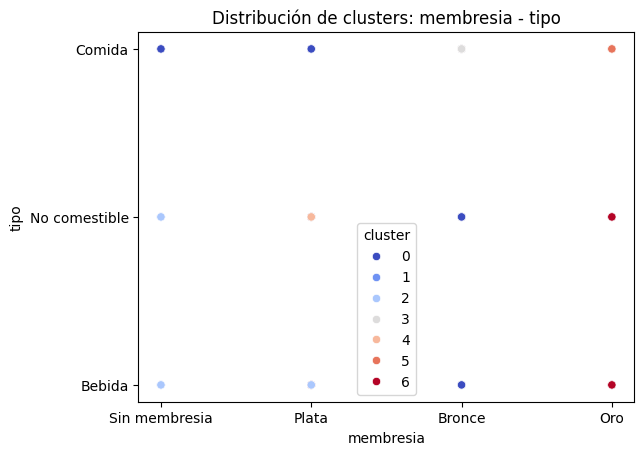

In [ ]:
dispersion('membresia', 'tipo', 'coolwarm')

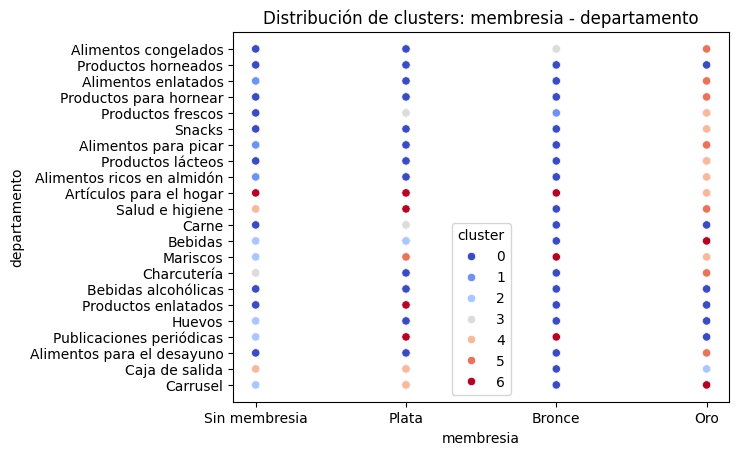

In [ ]:
dispersion('membresia', 'departamento', 'coolwarm')

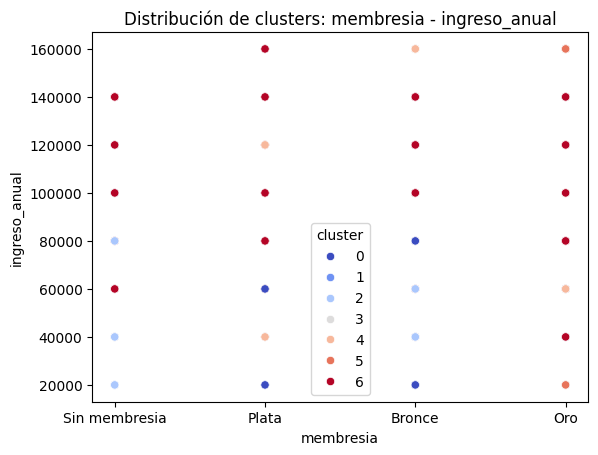

In [ ]:
dispersion('membresia', 'ingreso_anual', 'coolwarm')

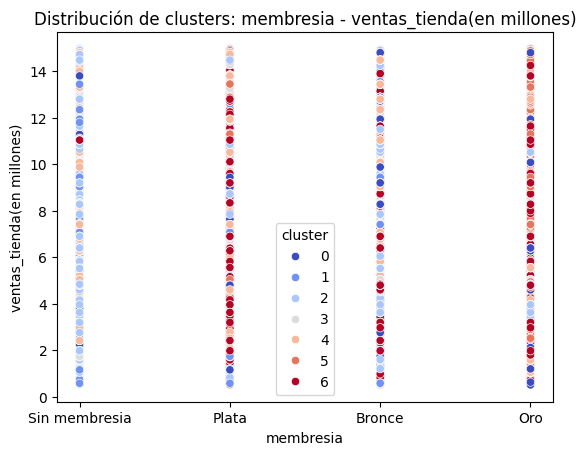

In [ ]:
dispersion('membresia', 'ventas_tienda(en millones)', 'coolwarm')

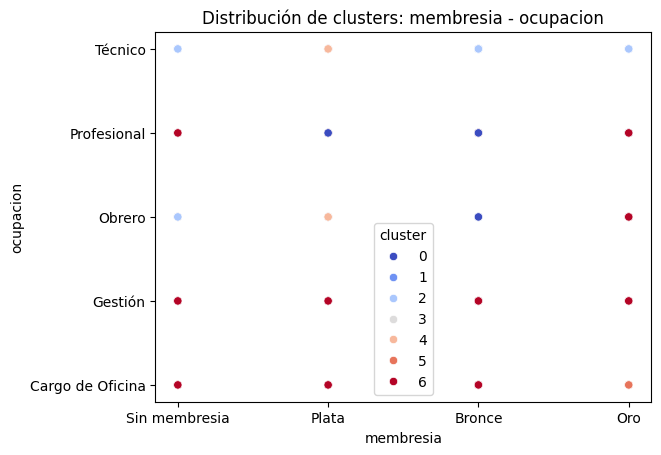

In [ ]:
dispersion('membresia', 'ocupacion', 'coolwarm')

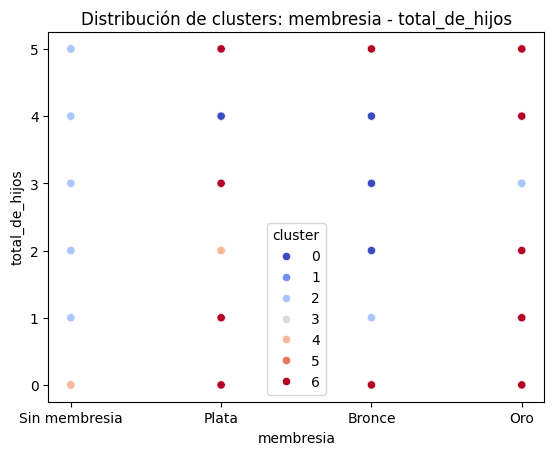

In [ ]:
dispersion('membresia', 'total_de_hijos', 'coolwarm')

####5.5.2.Dispersión por ocupación

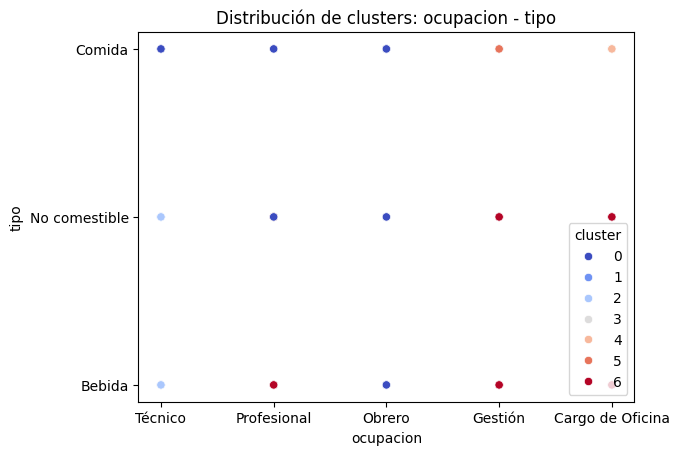

In [ ]:
dispersion('ocupacion', 'tipo', 'coolwarm')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


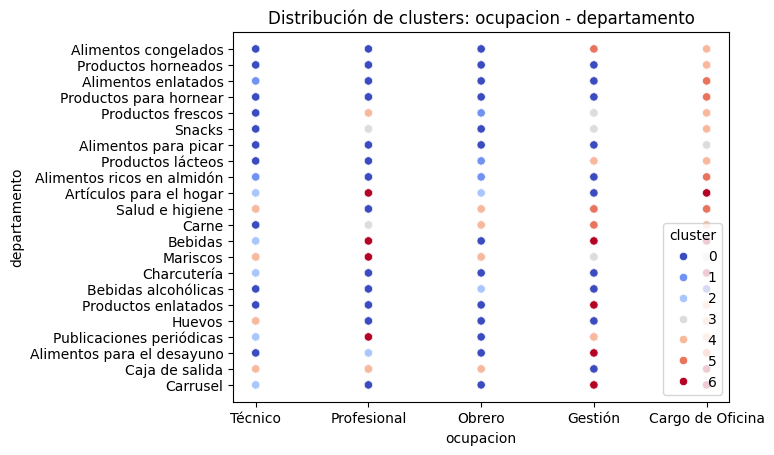

In [ ]:
dispersion('ocupacion', 'departamento', 'coolwarm')

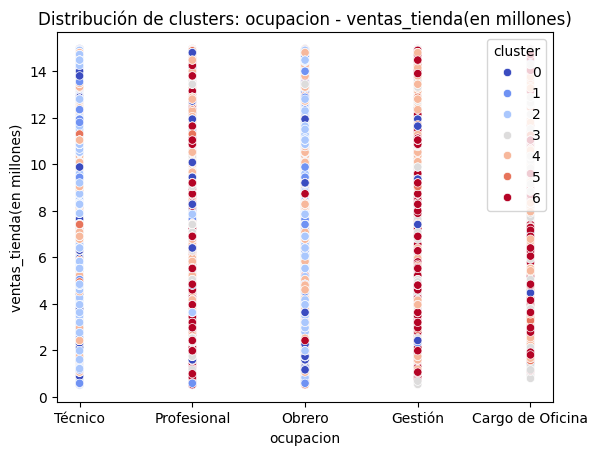

In [ ]:
dispersion('ocupacion', 'ventas_tienda(en millones)', 'coolwarm')

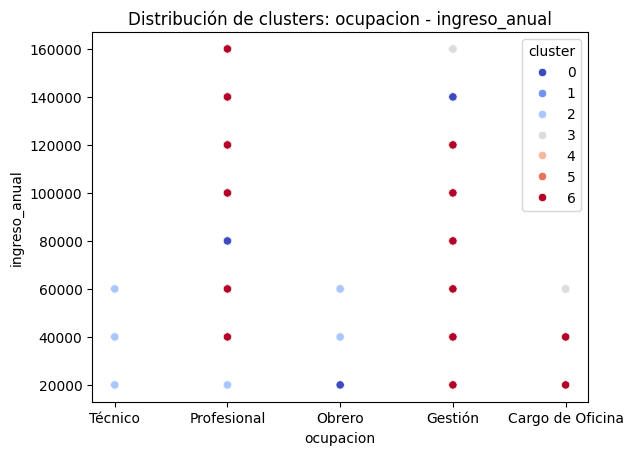

In [ ]:
dispersion('ocupacion', 'ingreso_anual', 'coolwarm')

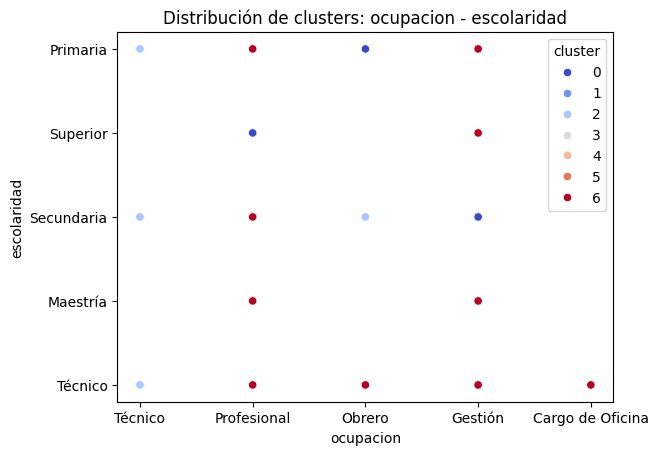

In [ ]:
dispersion('ocupacion', 'escolaridad', 'coolwarm')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


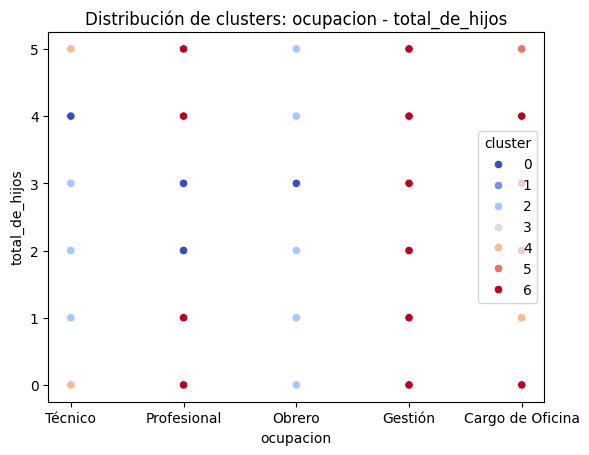

In [ ]:
dispersion('ocupacion', 'total_de_hijos', 'coolwarm')

####5.5.3.Dispersión por escolaridad

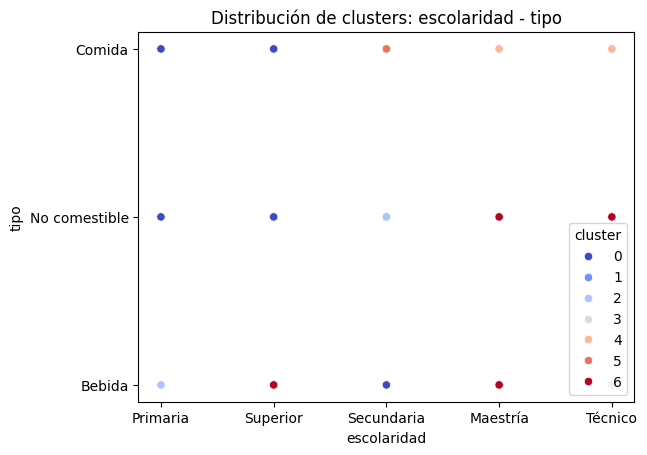

In [ ]:
dispersion('escolaridad', 'tipo', 'coolwarm')

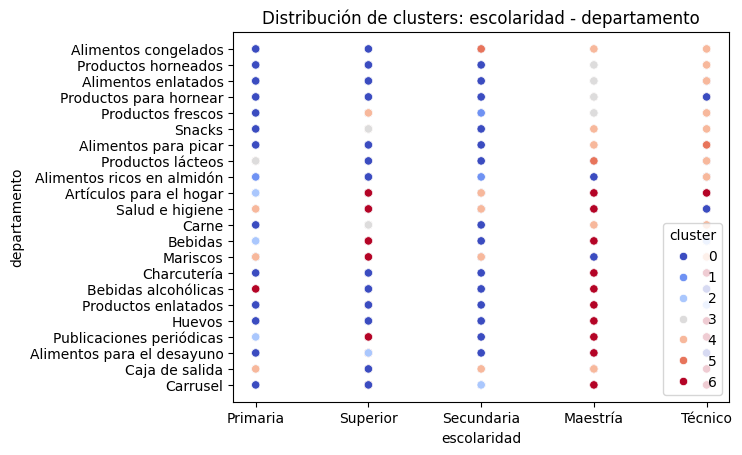

In [ ]:
dispersion('escolaridad', 'departamento', 'coolwarm')

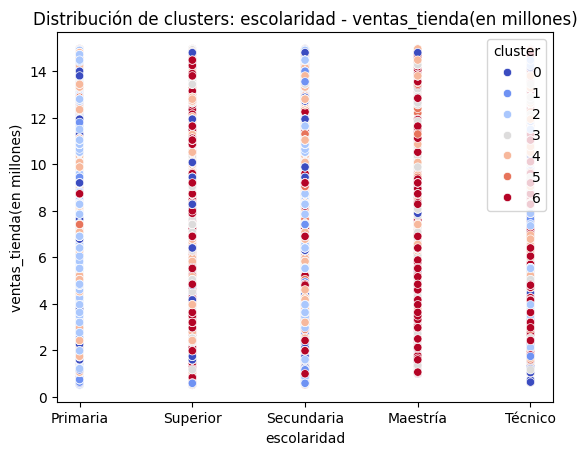

In [ ]:
dispersion('escolaridad', 'ventas_tienda(en millones)', 'coolwarm')

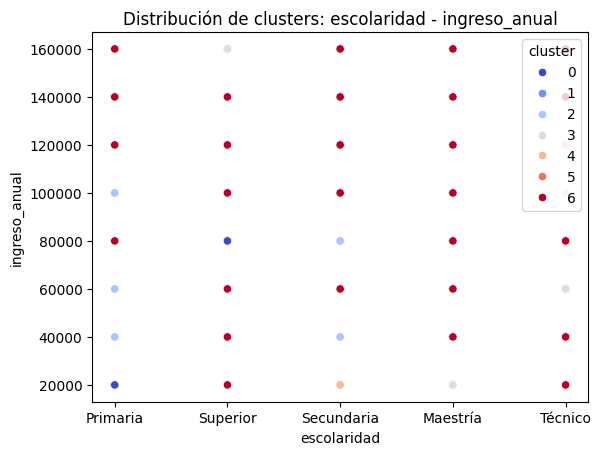

In [ ]:
dispersion('escolaridad', 'ingreso_anual', 'coolwarm')

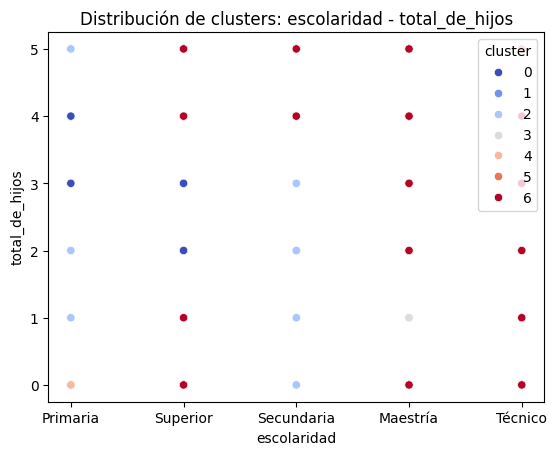

In [ ]:
dispersion('escolaridad', 'total_de_hijos', 'coolwarm')

####5.5.4.Dispersión por estado

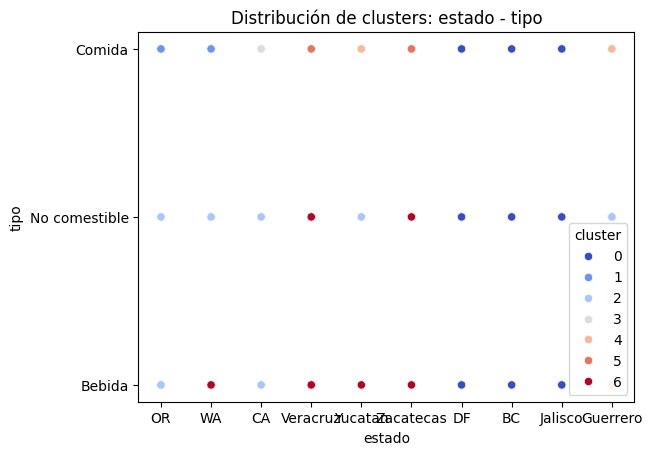

In [ ]:
dispersion('estado', 'tipo', 'coolwarm')

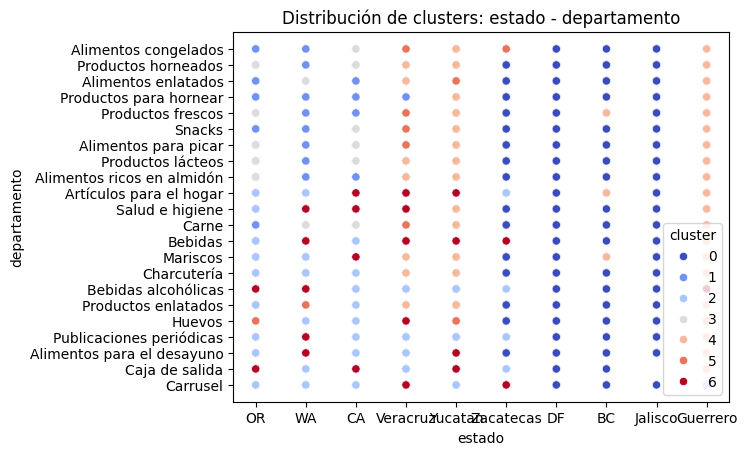

In [ ]:
dispersion('estado', 'departamento', 'coolwarm')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


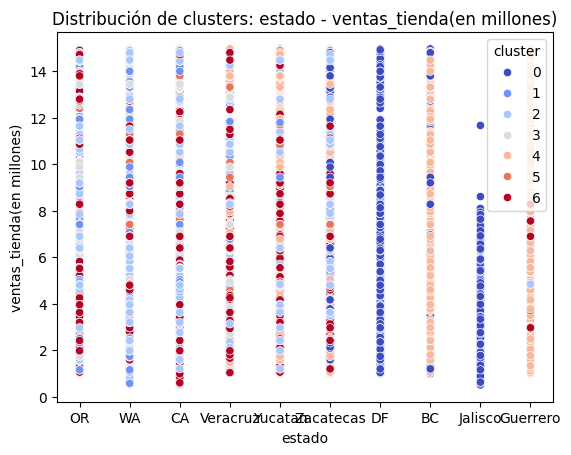

In [ ]:
dispersion('estado', 'ventas_tienda(en millones)', 'coolwarm')

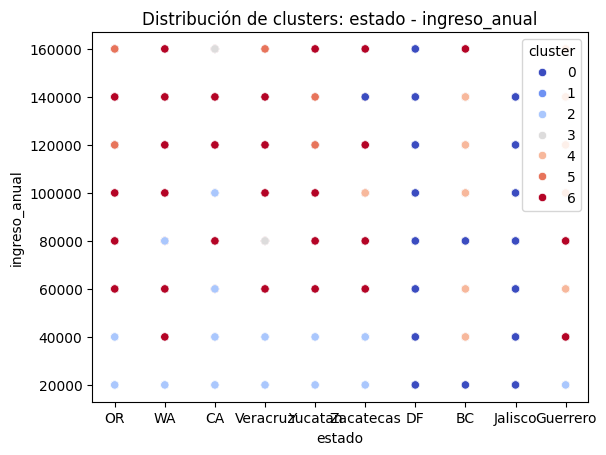

In [ ]:
dispersion('estado', 'ingreso_anual', 'coolwarm')

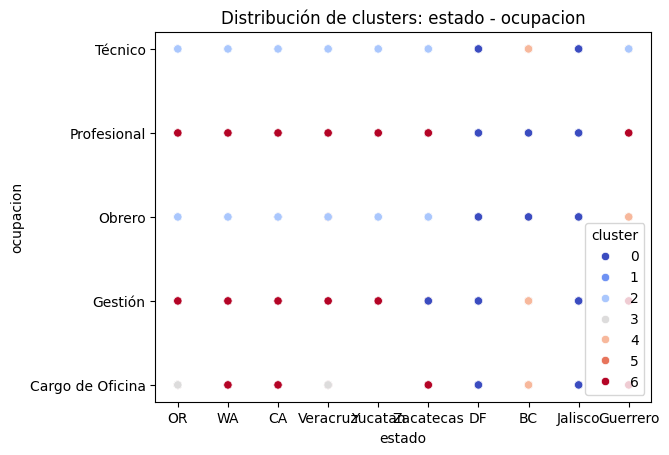

In [ ]:
dispersion('estado', 'ocupacion', 'coolwarm')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


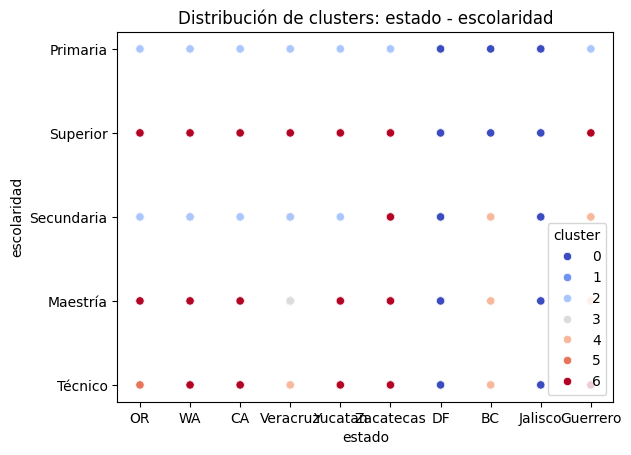

In [ ]:
dispersion('estado', 'escolaridad', 'coolwarm')

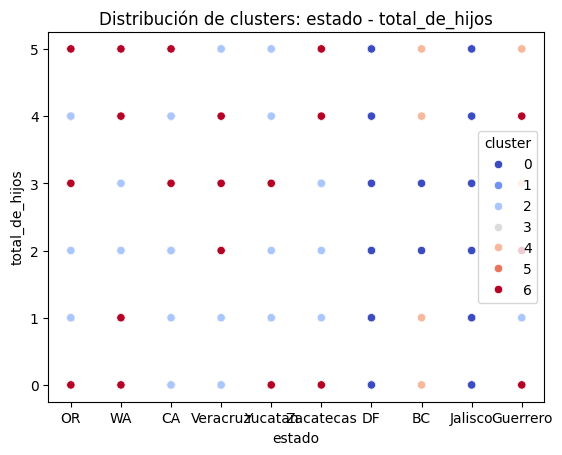

In [ ]:
dispersion('estado', 'total_de_hijos', 'coolwarm')

##6.Descripciones de los clusters

##7.Estrategias a implementar